In [1]:
%run setup.ipynb

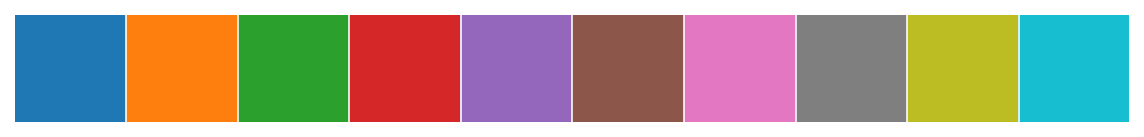

In [2]:
sns.palplot(sns.color_palette())

In [109]:
def plot_h12(pop, chromosome, ax=None, markersize=1, legend=False, step=5, detail=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
        sns.despine(ax=ax, offset=3)
        
    # load data
    windows, gwindows, h1, h12, h123, h2_h1 = load_h12_gwss(pop, chromosome)
    x = windows.mean(axis=1) / 1e6

    # plot data
    if detail:
        palette = sns.color_palette("Blues_d", 3)
        ax.plot(x[::step], h123[::step], linestyle=' ', marker='o', color=palette[0], markersize=markersize, label='H123')
        ax.plot(x[::step], h12[::step], linestyle=' ', marker='o', color=palette[1], markersize=markersize, label='H12')
        ax.plot(x[::step], h1[::step], linestyle=' ', marker='o', color=palette[2], markersize=markersize, label='H1')
    else:
        h12_color = sns.color_palette()[0]
        ax.plot(x[::step], h12[::step], linestyle=' ', marker='o', color=h12_color, markersize=markersize, label='H12')
        
    # tidy plot
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
#     ax.set_yticks([0, 1])
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(.1))
    ax.set_ylim(0, 1)
    if detail and legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    

In [110]:
sns.set_style('white')
sns.set_style('ticks')

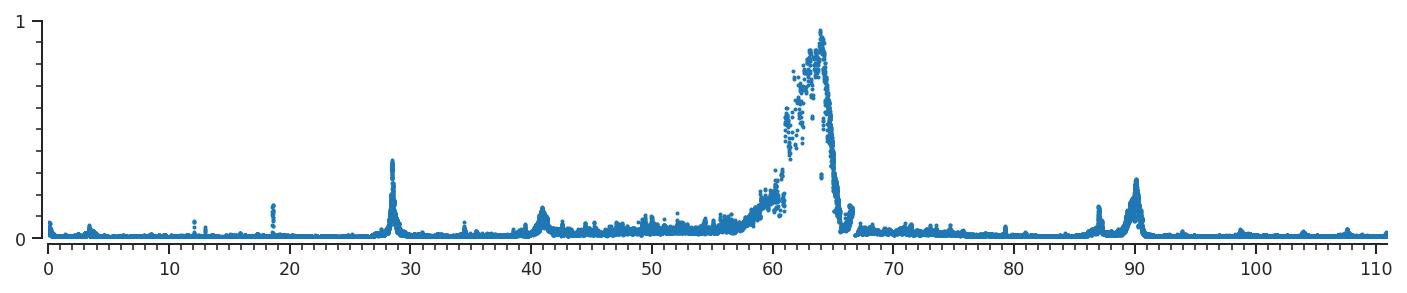

In [111]:
plot_h12('bf_gam', '2', step=1)

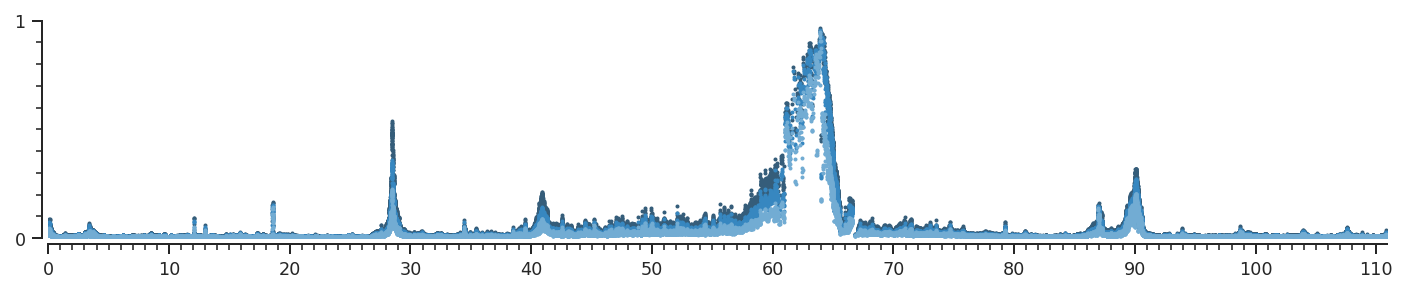

In [112]:
plot_h12('bf_gam', '2', step=1, detail=True)

In [113]:
def plot_ihs(pop, chromosome, ax=None, markersize=1, window_size=200, window_step=100, 
             step=2, legend=False, detail=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
        sns.despine(ax=ax, offset=3)

    # load data    
    x, gx, y_max, y_pc95, y_pc75, y_pc50 = load_ihs_gwss(pop, chromosome, window_size=window_size, window_step=window_step)
    x = x/1e6  # convert to Mbp
    
    # plot data
    if detail:
        palette = sns.color_palette("Reds_d", 4)
        ax.plot(x[::step], y_max.clip(0, 10)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
        ax.plot(x[::step], y_pc95.clip(0, 10)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
        ax.plot(x[::step], y_pc75.clip(0, 10)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
        ax.plot(x[::step], y_pc50.clip(0, 10)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')
    else:
        palette = sns.color_palette()
        ax.plot(x[::step], y_max.clip(0, 10)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{100}$')
        
    # tidy plot
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(1, 10)
#     ax.set_yticks([0, 10])
    if detail and legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    

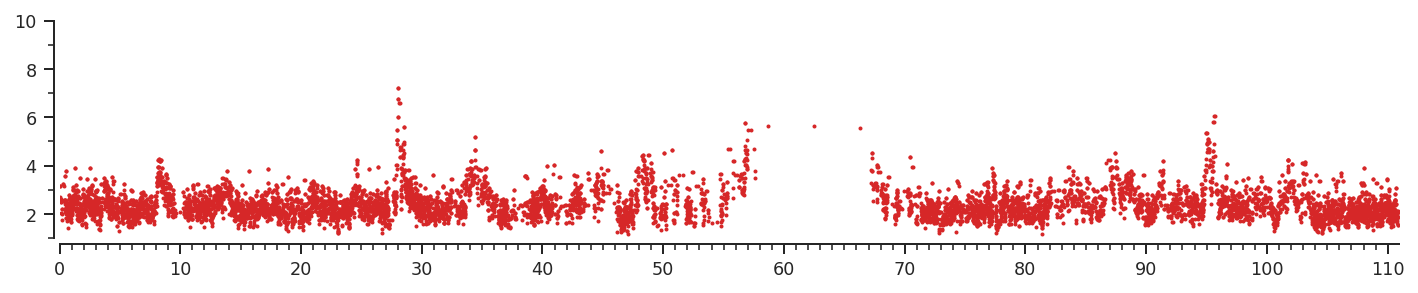

In [114]:
plot_ihs('ao_col', '2', step=1)

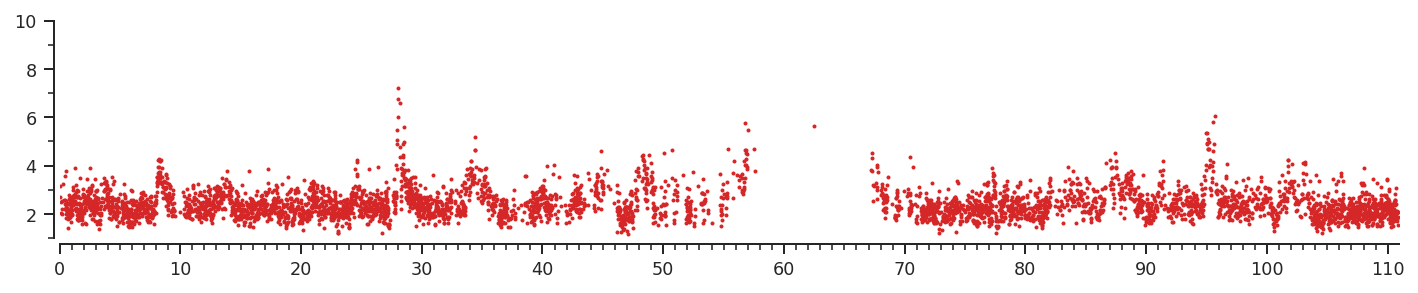

In [115]:
plot_ihs('ao_col', '2', step=2)

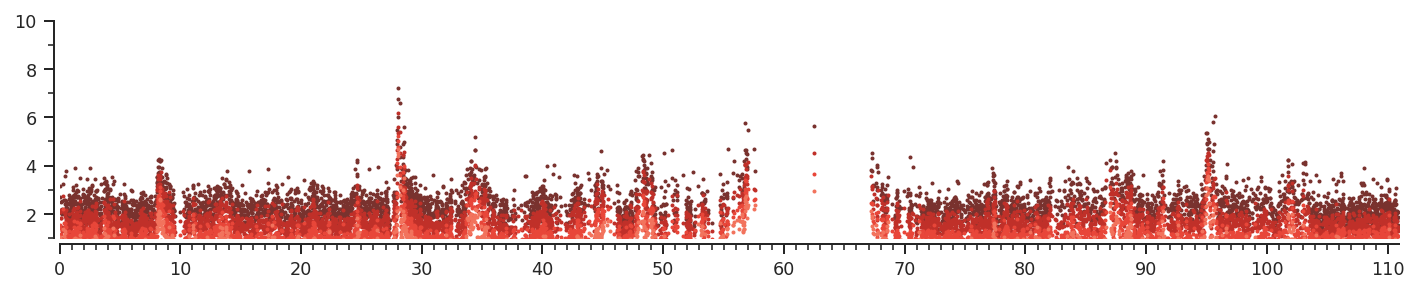

In [116]:
plot_ihs('ao_col', '2', detail=True)

In [117]:
def plot_xpehh(pop1, pop2, chromosome, ax=None, markersize=1, window_size=500, 
               window_step=250, step=2, legend=False, label=False, detail=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
        sns.despine(ax=ax, offset=3)
        
    # load data
    x, gx, y_max, y_pc95, y_pc75, y_pc50 = load_xpehh_gwss(pop1, pop2, chromosome, window_size=window_size, window_step=window_step)
    x = x/1e6  # convert to Mbp
    
    # plot data
    if detail:
        palette = sns.color_palette("Greens_d", 4)
        ax.plot(x[::step], y_max.clip(0, 6)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
        ax.plot(x[::step], y_pc95.clip(0, 6)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
        ax.plot(x[::step], y_pc75.clip(0, 6)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
        ax.plot(x[::step], y_pc50.clip(0, 6)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')
    else:
        palette = sns.color_palette()
        ax.plot(x[::step], y_max.clip(0, 6)[::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{100}$')
        
    # tidy plot
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
#     ax.set_yticks([0, 6])
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0, 6)
    if detail and legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    if label:
        pop2_label = (
            pop_defs[pop2]["label"]
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(f'vs. {pop2_label}', xy=(0, 6), xytext=(2, -2), textcoords='offset points', fontsize=7, va='top', ha='left')
    

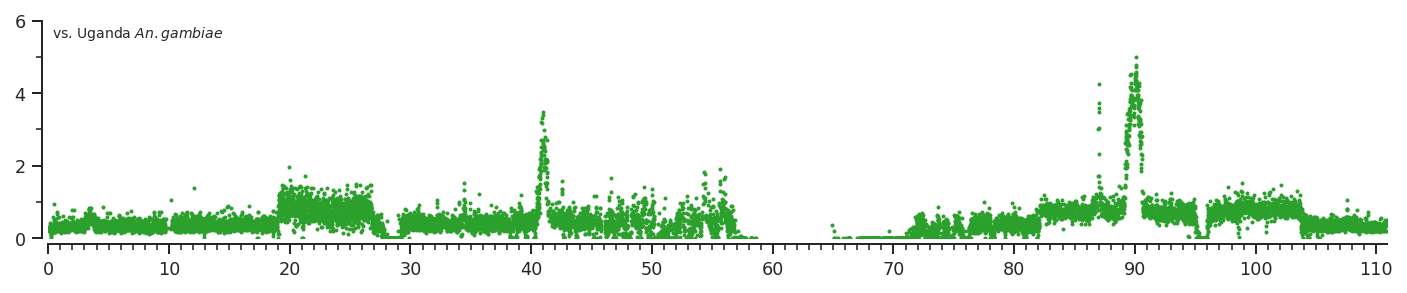

In [118]:
plot_xpehh('bf_gam', 'ug_gam', '2', label=True)

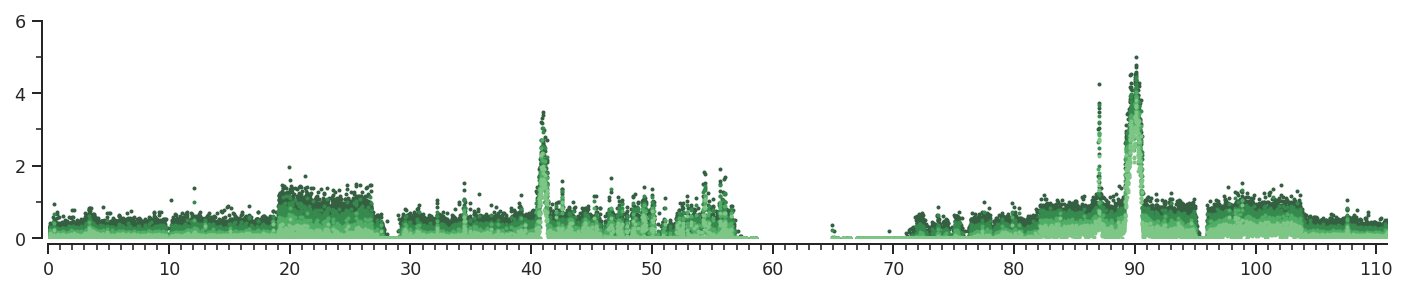

In [119]:
plot_xpehh('bf_gam', 'ug_gam', '2', detail=True)

In [120]:
def plot_pbs(pop1, pop2, pop3, chromosome, ax=None, markersize=1, window_size=500, 
             window_step=250, step=2, label=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
        sns.despine(ax=ax, offset=3)
        
    # load data
    windows, gwindows, pbs, pbs_scaled = load_pbs_gwss(
        pop1, pop2, pop3, chromosome, window_size=window_size, window_step=window_step
    )
    x = windows.mean(axis=1)/1e6  # convert to Mbp
    
    # plot data
    palette = sns.color_palette()
    ax.plot(x[::step], pbs_scaled.clip(0, 50)[::step], marker='o', linestyle=' ', markersize=markersize, 
            color=palette[4])
    
    # tidy plot
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.set_ylim(0, 50)
#     ax.set_yticks([0, 50])
    if label:
        pop2_label = pop_defs[pop2]["label"]
        pop3_label = pop_defs[pop3]["label"]
        annotation = (
            f'vs. {pop2_label}, {pop3_label}'
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(annotation, xy=(0, 50), xytext=(2, -2), textcoords='offset points', fontsize=7, va='top', ha='left')
    

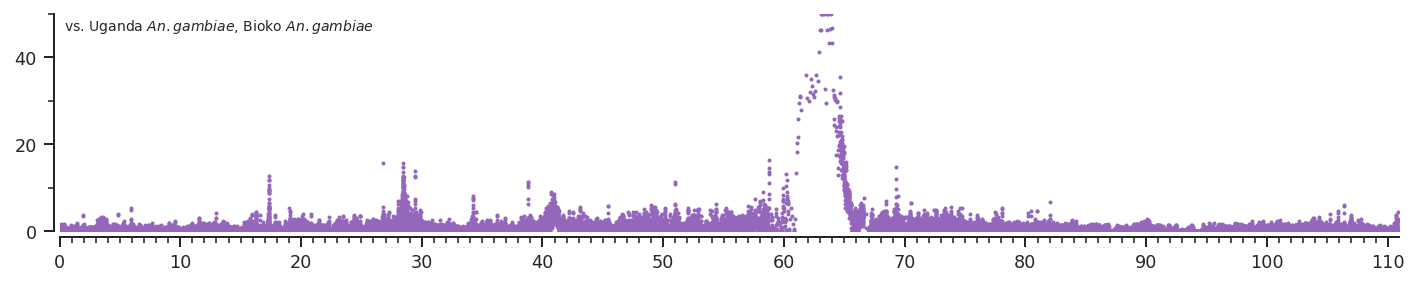

In [121]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', '2', label=True, step=1)

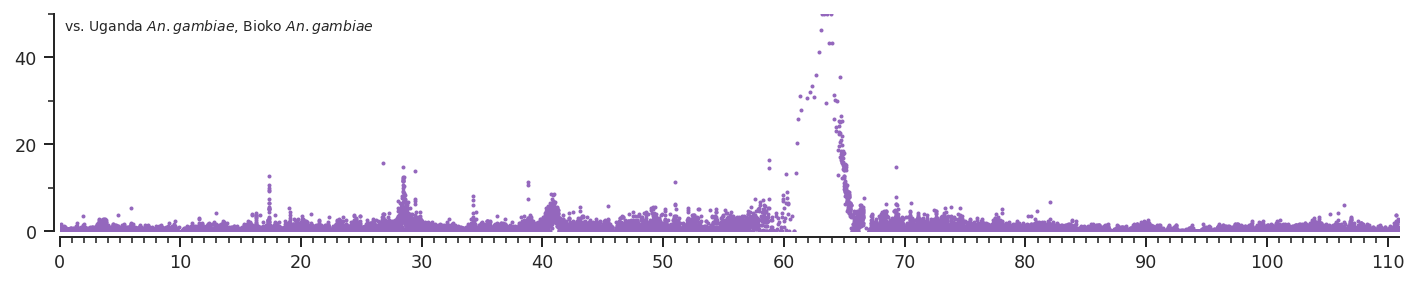

In [122]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', '2', label=True)

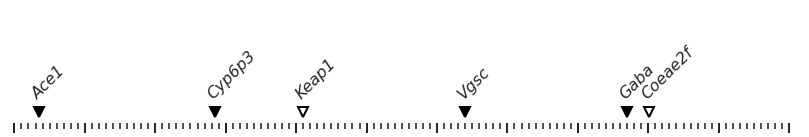

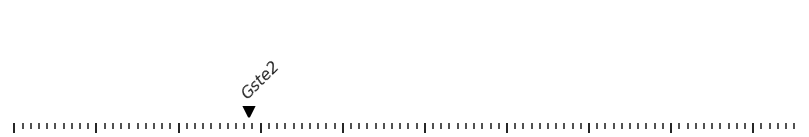

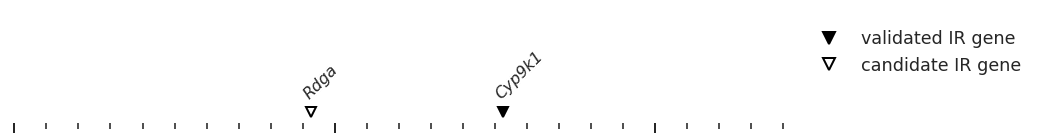

In [123]:
def guide_loci(chromosome, ax, ymax=1):
    for gene in validated_ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.axvline(x, ymin=0, ymax=ymax, color='#aaaaaa', linestyle='--', linewidth=1)
    for gene in candidate_ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.axvline(x, ymin=0, ymax=ymax, color='#aaaaaa', linestyle='--', linewidth=1)
    
    
def plot_loci(chromosome, ax=None, legend=False, y=.1):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 1), facecolor='w')
        sns.despine(left=True, bottom=True)
#     guide_loci(chromosome, ax=ax, ymax=.3)
    for gene in validated_ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.plot([x], [y], marker='v', linestyle=' ', color='k')
            ax.annotate(gene['Name'], xy=(x, y), xytext=(-5, 5), textcoords='offset points', 
                        fontstyle='italic', ha='left', va='bottom', fontsize=8, rotation=45)
    for gene in candidate_ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.plot([x], [y], marker='v', linestyle=' ', color='k', mfc='none')
            ax.annotate(gene['Name'], xy=(x, y), xytext=(-5, 5), textcoords='offset points', 
                        fontstyle='italic', ha='left', va='bottom', fontsize=8, rotation=45)
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(0, chromosome_plen[chromosome]/1e6)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    if legend:
        from matplotlib.lines import Line2D
        validated_gene_marker = Line2D([], [], linestyle=' ', marker='v', color='k', 
                                       label='validated IR gene', markersize=6)
        candidate_gene_marker = Line2D([], [], linestyle=' ', marker='v', mfc='none', 
                                       mec='k', label='candidate IR gene', markersize=6)
        ax.legend(handles=[validated_gene_marker, candidate_gene_marker], bbox_to_anchor=(1, 1), 
                  loc='upper left', facecolor='w', edgecolor='w')
    
    
plot_loci('2')
plot_loci('3')
plot_loci('X', legend=True)

In [141]:
def fig_gwss(pop, xpehh_pop, pbs_pops, markersize=.5, figsize=(12, 7), savefig=True, savefig_dpi=150, detail=False):
    
    fig = plt.figure(figsize=figsize, facecolor='w')
    width_ratios = [chromosome_plen[c] for c in chromosomes]
    gs = fig.add_gridspec(ncols=3, nrows=5, width_ratios=width_ratios, height_ratios=[1.8, 3, 3, 3, 3])
    
    # Loci
    
    ax = fig.add_subplot(gs[0, 0])
    sns.despine(ax=ax, offset=3, left=True)
    plot_loci(chromosome='2', ax=ax)
    ax.set_title('Chromosome 2')
    
    ax = fig.add_subplot(gs[0, 1])
    sns.despine(ax=ax, offset=3, left=True)
    plot_loci(chromosome='3', ax=ax)
    ax.set_title('Chromosome 3')
    
    ax = fig.add_subplot(gs[0, 2])
    sns.despine(ax=ax, offset=3, left=True)
    plot_loci(chromosome='X', ax=ax, legend=detail)
    ax.set_title('Chromosome X')
    
    # H12
    
    ax = fig.add_subplot(gs[1, 0])
    sns.despine(ax=ax, offset=3)
#     guide_loci('2', ax=ax)
    plot_h12(pop, chromosome='2', ax=ax, markersize=markersize, detail=detail)
    ax.set_ylabel('$H12$')
    ax.set_xticklabels([])

    ax = fig.add_subplot(gs[1, 1])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('3', ax=ax)
    plot_h12(pop, chromosome='3', ax=ax, markersize=markersize, detail=detail)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)

    ax = fig.add_subplot(gs[1, 2])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('X', ax=ax)
    plot_h12(pop, chromosome='X', ax=ax, markersize=markersize, detail=detail, legend=detail)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    
    # IHS
    
    ax = fig.add_subplot(gs[2, 0])
    sns.despine(ax=ax, offset=3)
#     guide_loci('2', ax=ax)
    plot_ihs(pop, chromosome='2', ax=ax, markersize=markersize, detail=detail)
    ax.set_ylabel('$|IHS|$')
    ax.set_xticklabels([])
    
    ax = fig.add_subplot(gs[2, 1])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('3', ax=ax)
    plot_ihs(pop, chromosome='3', ax=ax, markersize=markersize, detail=detail)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    ax = fig.add_subplot(gs[2, 2])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('X', ax=ax)
    plot_ihs(pop, chromosome='X', ax=ax, markersize=markersize, detail=detail, legend=detail)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    # XPEHH

    ax = fig.add_subplot(gs[3, 0])
    sns.despine(ax=ax, offset=3)
#     guide_loci('2', ax=ax)
    plot_xpehh(pop, xpehh_pop, chromosome='2', ax=ax, markersize=markersize, detail=detail, label=True)
    ax.set_ylabel('$XPEHH$')
    ax.set_xticklabels([])
    
    ax = fig.add_subplot(gs[3, 1])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('3', ax=ax)
    plot_xpehh(pop, xpehh_pop, chromosome='3', ax=ax, markersize=markersize, detail=detail)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    ax = fig.add_subplot(gs[3, 2])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('X', ax=ax)
    plot_xpehh(pop, xpehh_pop, chromosome='X', ax=ax, markersize=markersize, detail=detail, legend=detail)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    # PBS
    pop2, pop3 = pbs_pops

    ax = fig.add_subplot(gs[4, 0])
    sns.despine(ax=ax, offset=3)
#     guide_loci('2', ax=ax)
    plot_pbs(pop, pop2, pop3, chromosome='2', ax=ax, markersize=markersize, label=True)
    ax.set_ylabel('$PBS$')
    ax.set_xlabel(f'Position (Mbp)')
    
    ax = fig.add_subplot(gs[4, 1])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('3', ax=ax)
    plot_pbs(pop, pop2, pop3, chromosome='3', ax=ax, markersize=markersize)
    ax.set_xlabel(f'Position (Mbp)')
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    ax = fig.add_subplot(gs[4, 2])
    sns.despine(ax=ax, offset=3, left=True)
    ax.yaxis.set_tick_params(length=0, which='both')
#     guide_loci('X', ax=ax)
    plot_pbs(pop, pop2, pop3, chromosome='X', ax=ax, markersize=markersize)
    ax.set_xlabel(f'Position (Mbp)')
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    pop_label = (
        pop_defs[pop]["label"]
        .replace('An. gambiae', '$An. gambiae$')
        .replace('An. coluzzii', '$An. coluzzii$')
    )
    fig.suptitle(pop_label, y=.96)
    fig.tight_layout()
    
    if savefig:
        pbs_pop2, pbs_pop3 = pbs_pops
        file_path = here() / f'artwork/gwss_{pop}_{xpehh_pop}_{pbs_pop2}_{pbs_pop3}{"_detail" if detail else ""}.png'
        fig.savefig(file_path, bbox_inches='tight', dpi=savefig_dpi)


In [142]:
list(pop_defs)

['ao_col',
 'bf_col',
 'bf_gam',
 'ci_col',
 'cm_sav_gam',
 'fr_gam',
 'ga_gam',
 'gh_col',
 'gh_gam',
 'gm',
 'gn_gam',
 'gq_gam',
 'gw',
 'ke',
 'ug_gam']

## Burkina Faso *An. gambiae*

In [143]:
([x for x in xpehh_root if x.startswith('bf_gam')], 
 [x for x in pbs_root if x.startswith('bf_gam')])

(['bf_gam_fr_gam',
  'bf_gam_ga_gam',
  'bf_gam_gm',
  'bf_gam_gq_gam',
  'bf_gam_gw',
  'bf_gam_ke',
  'bf_gam_ug_gam'],
 ['bf_gam_bf_col_gq_gam',
  'bf_gam_bf_col_gw',
  'bf_gam_gq_gam_gw',
  'bf_gam_ug_gam_gq_gam',
  'bf_gam_ug_gam_gw'])

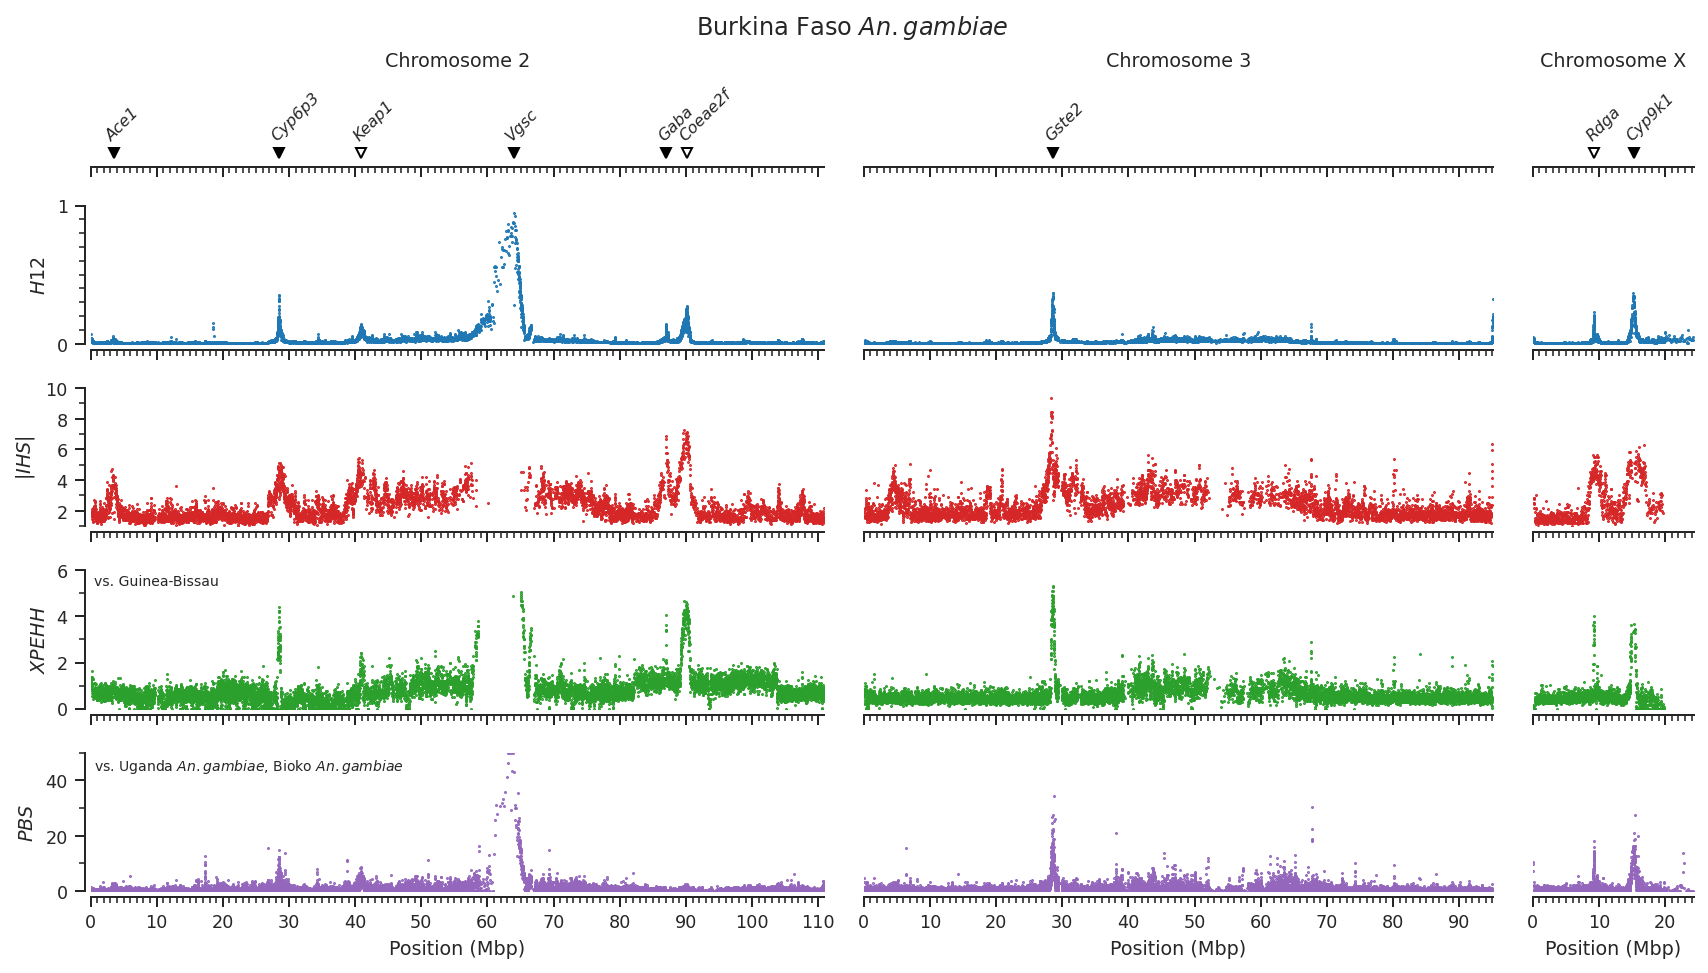

In [144]:
fig_gwss('bf_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

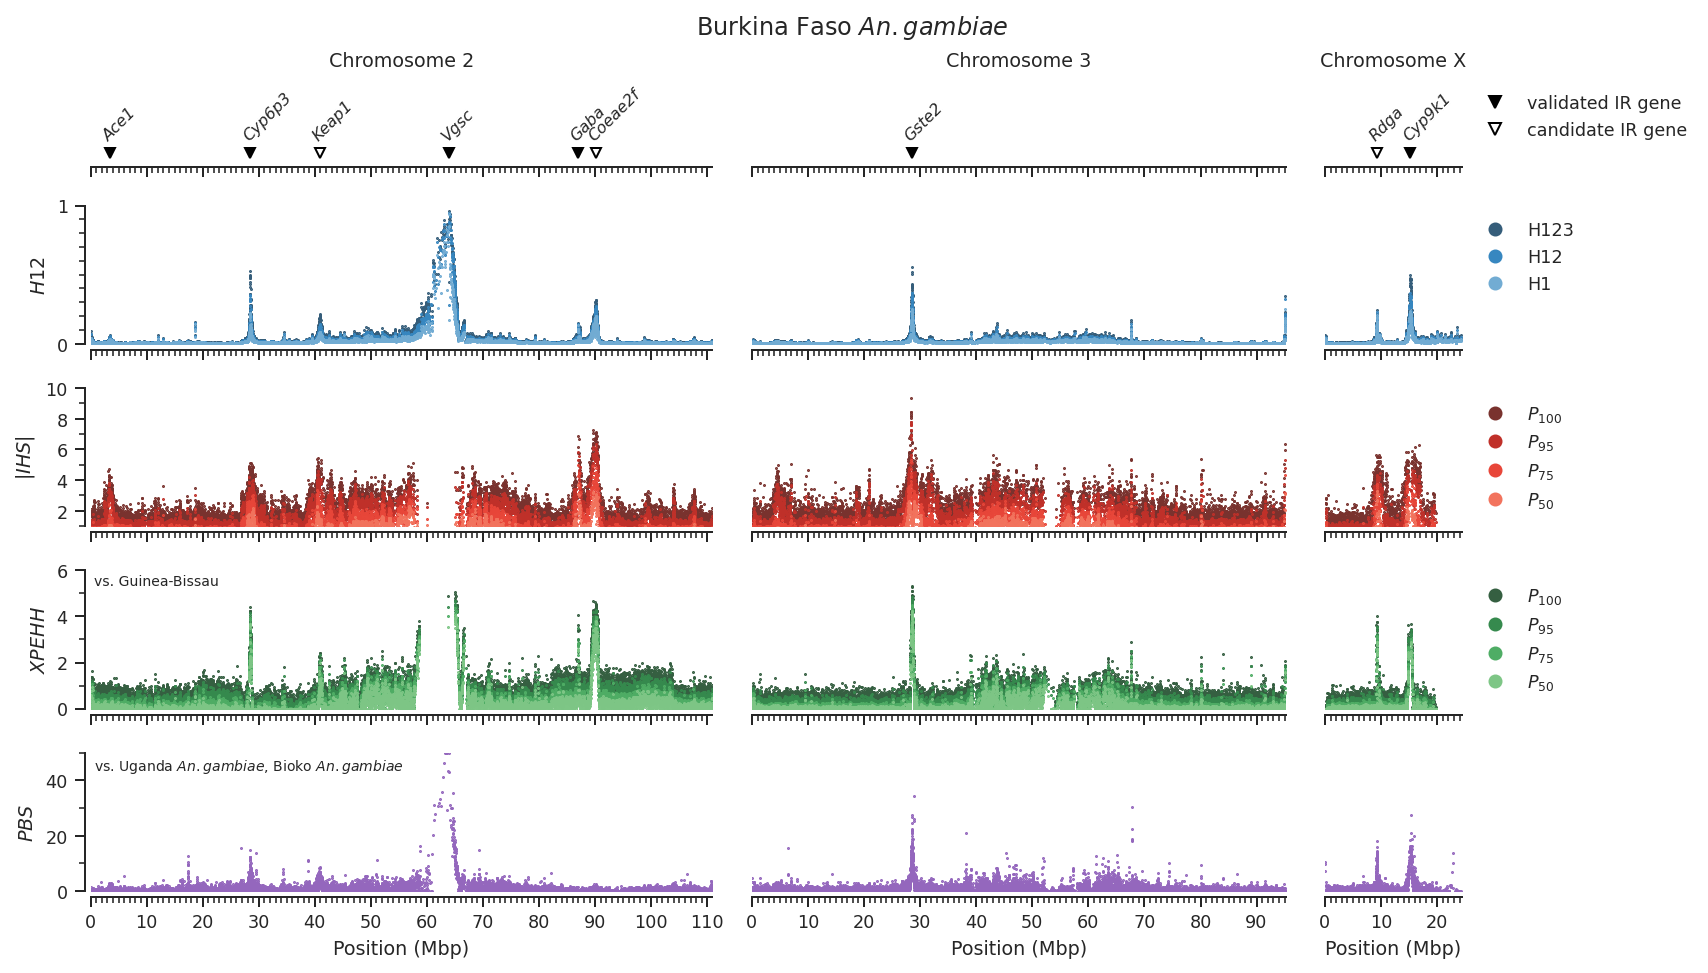

In [147]:
fig_gwss('bf_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'), detail=True)

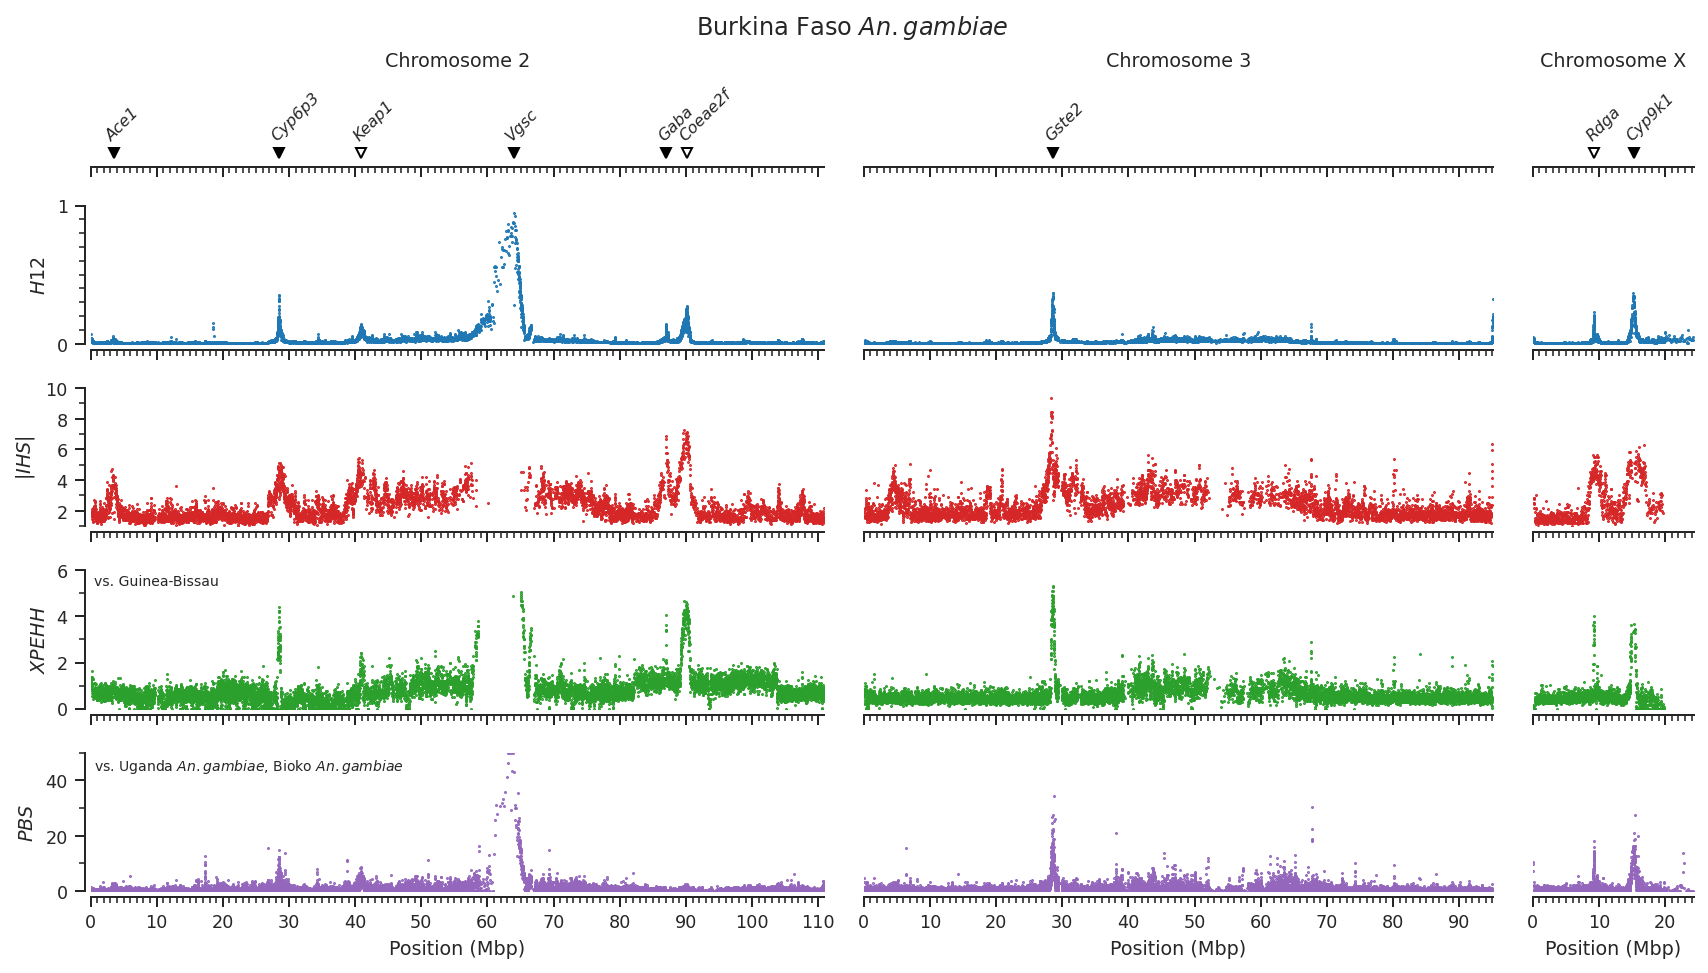

In [148]:
fig_gwss('bf_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

## Guinea *An. gambiae*

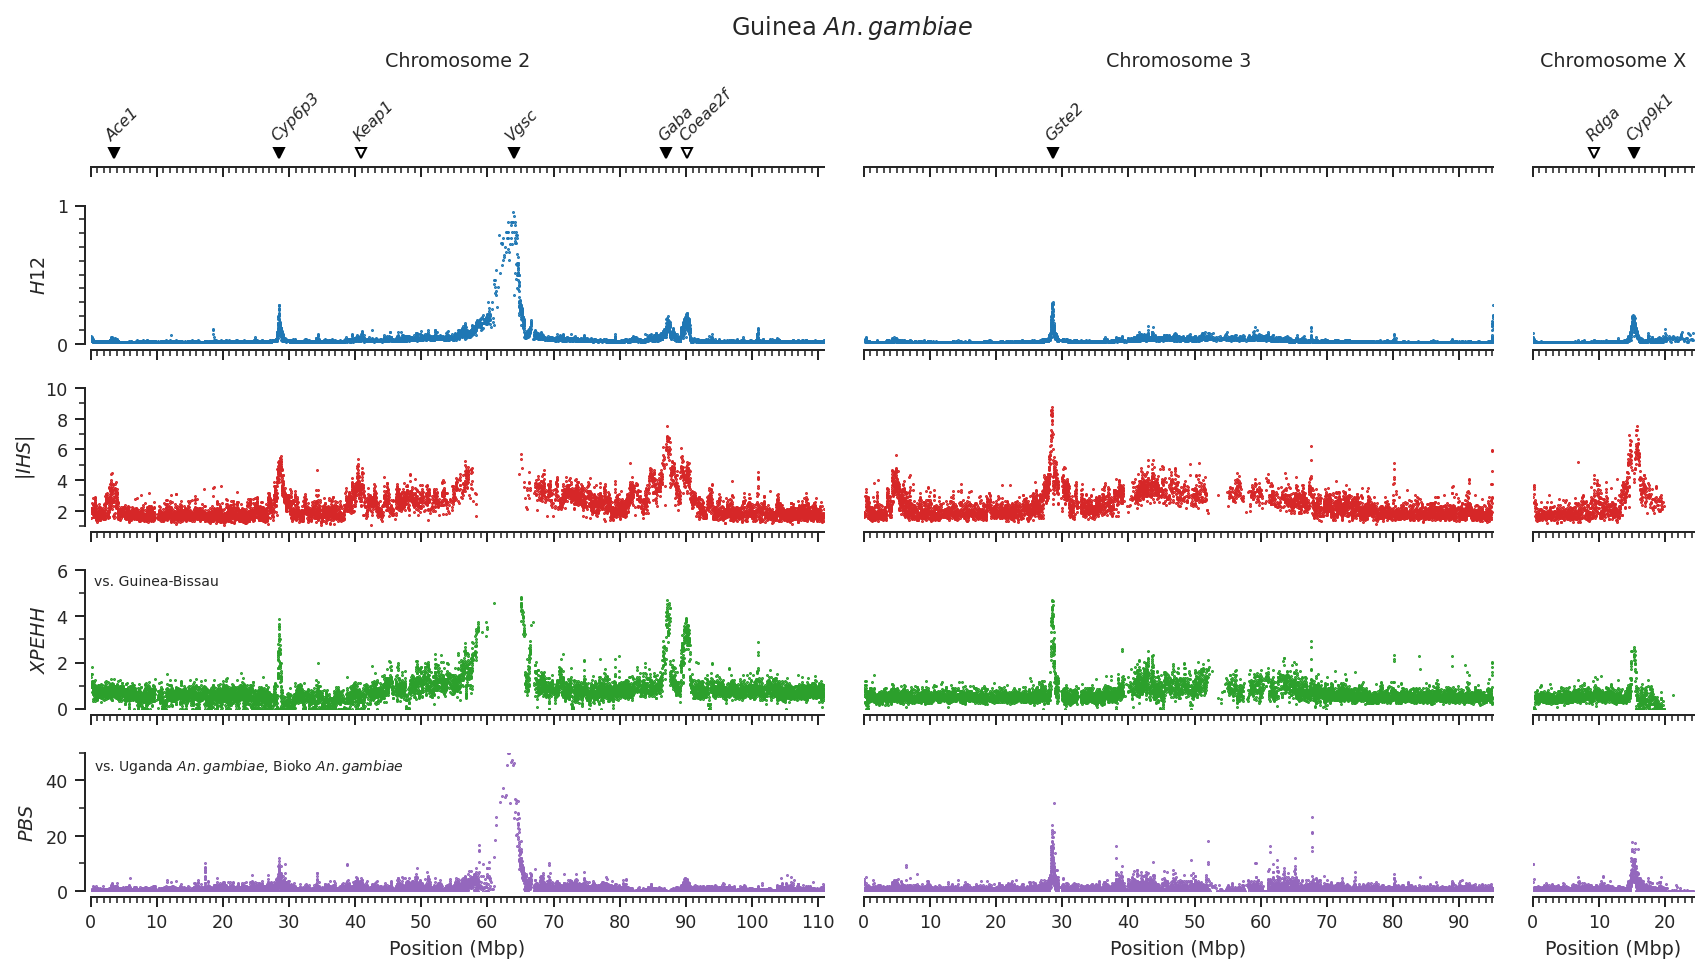

In [149]:
fig_gwss('gn_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

## Cameroon *An. gambiae*

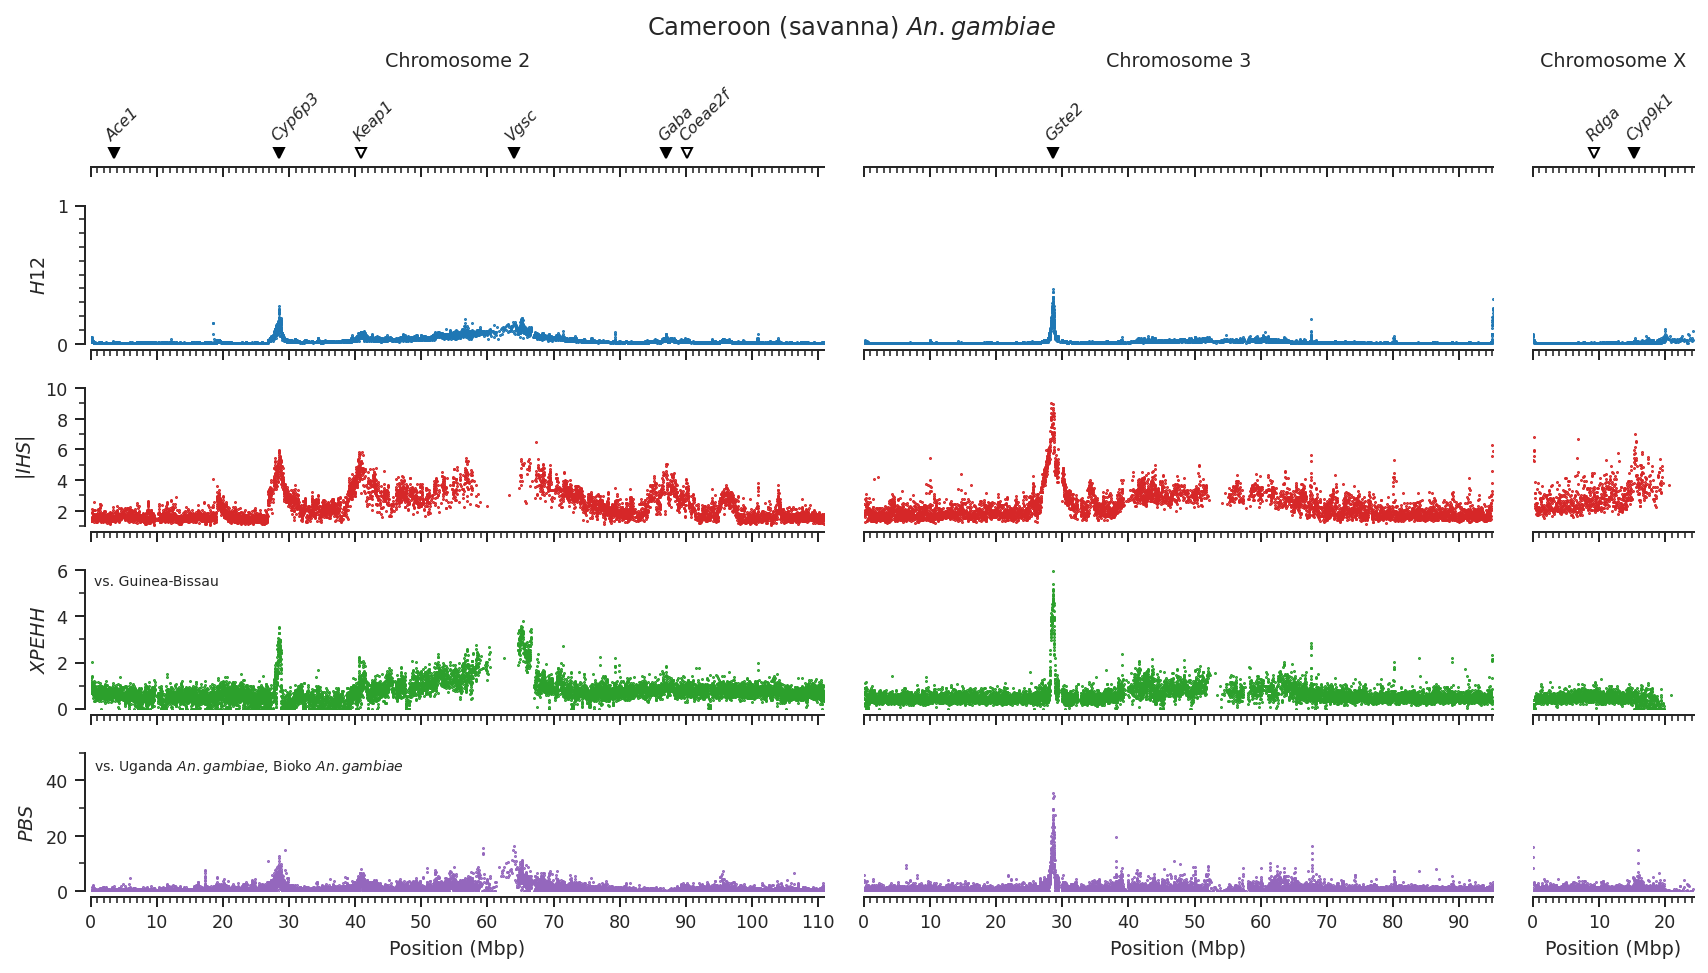

In [150]:
fig_gwss('cm_sav_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

## Uganda *An. gambiae*

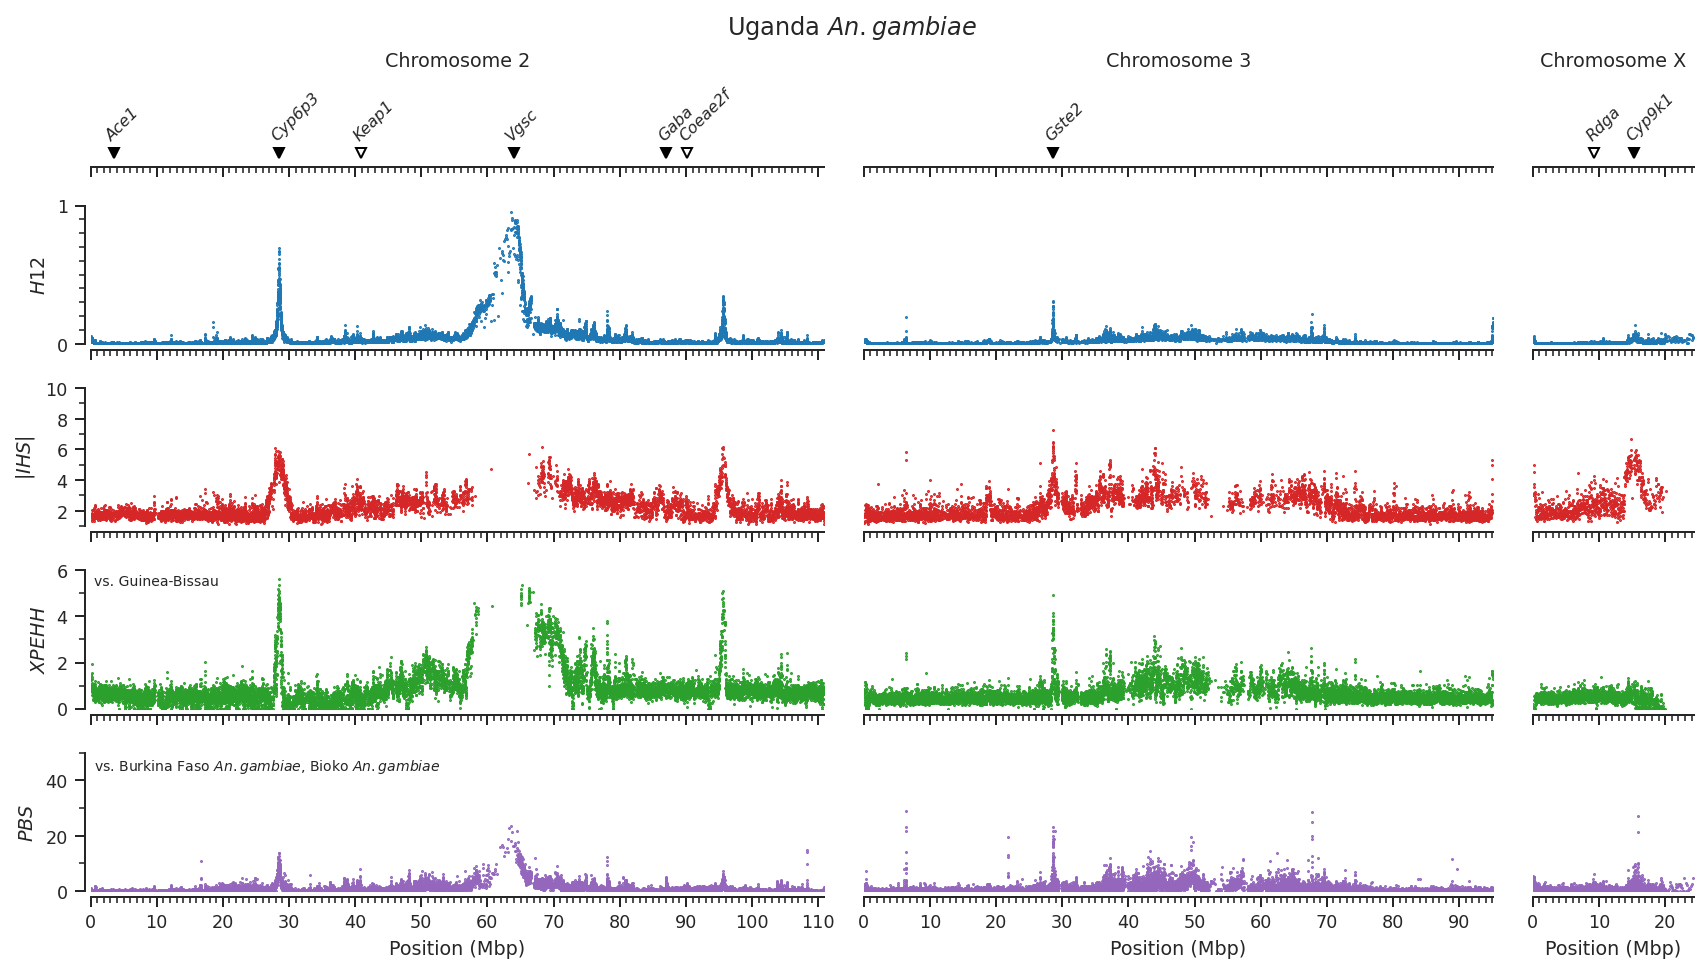

In [151]:
fig_gwss('ug_gam', xpehh_pop='gw', pbs_pops=('bf_gam', 'gq_gam'))

## Ghana *An. gambiae*

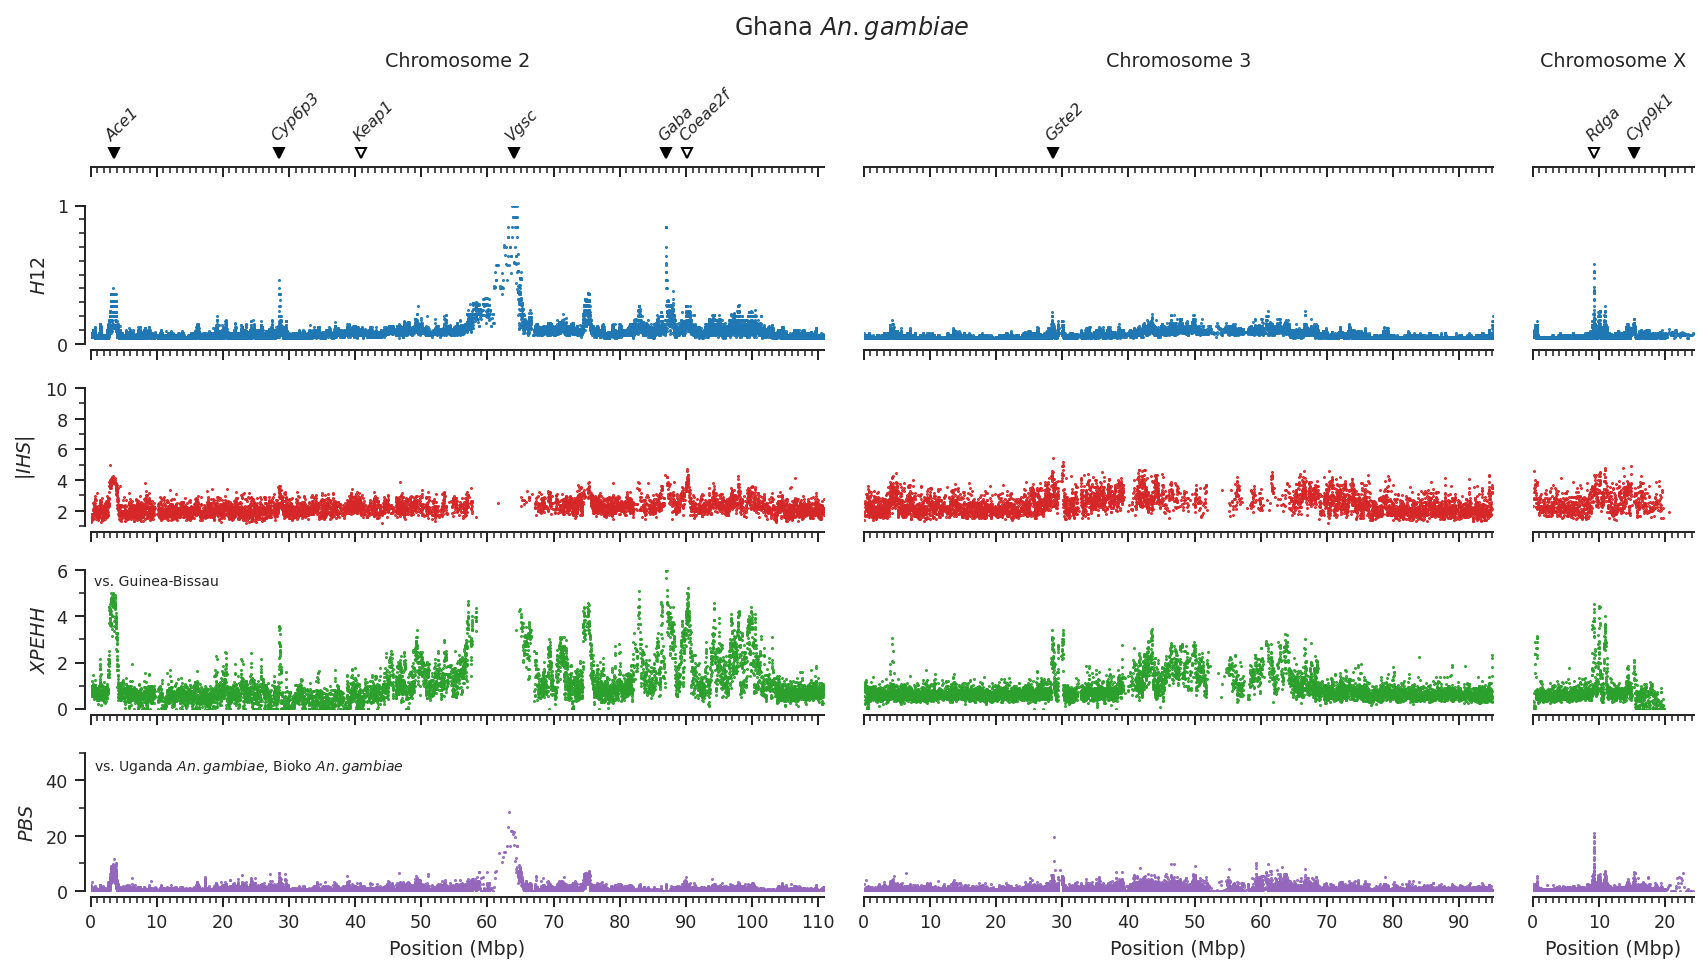

In [152]:
fig_gwss('gh_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

## Gabon *An. gambiae*

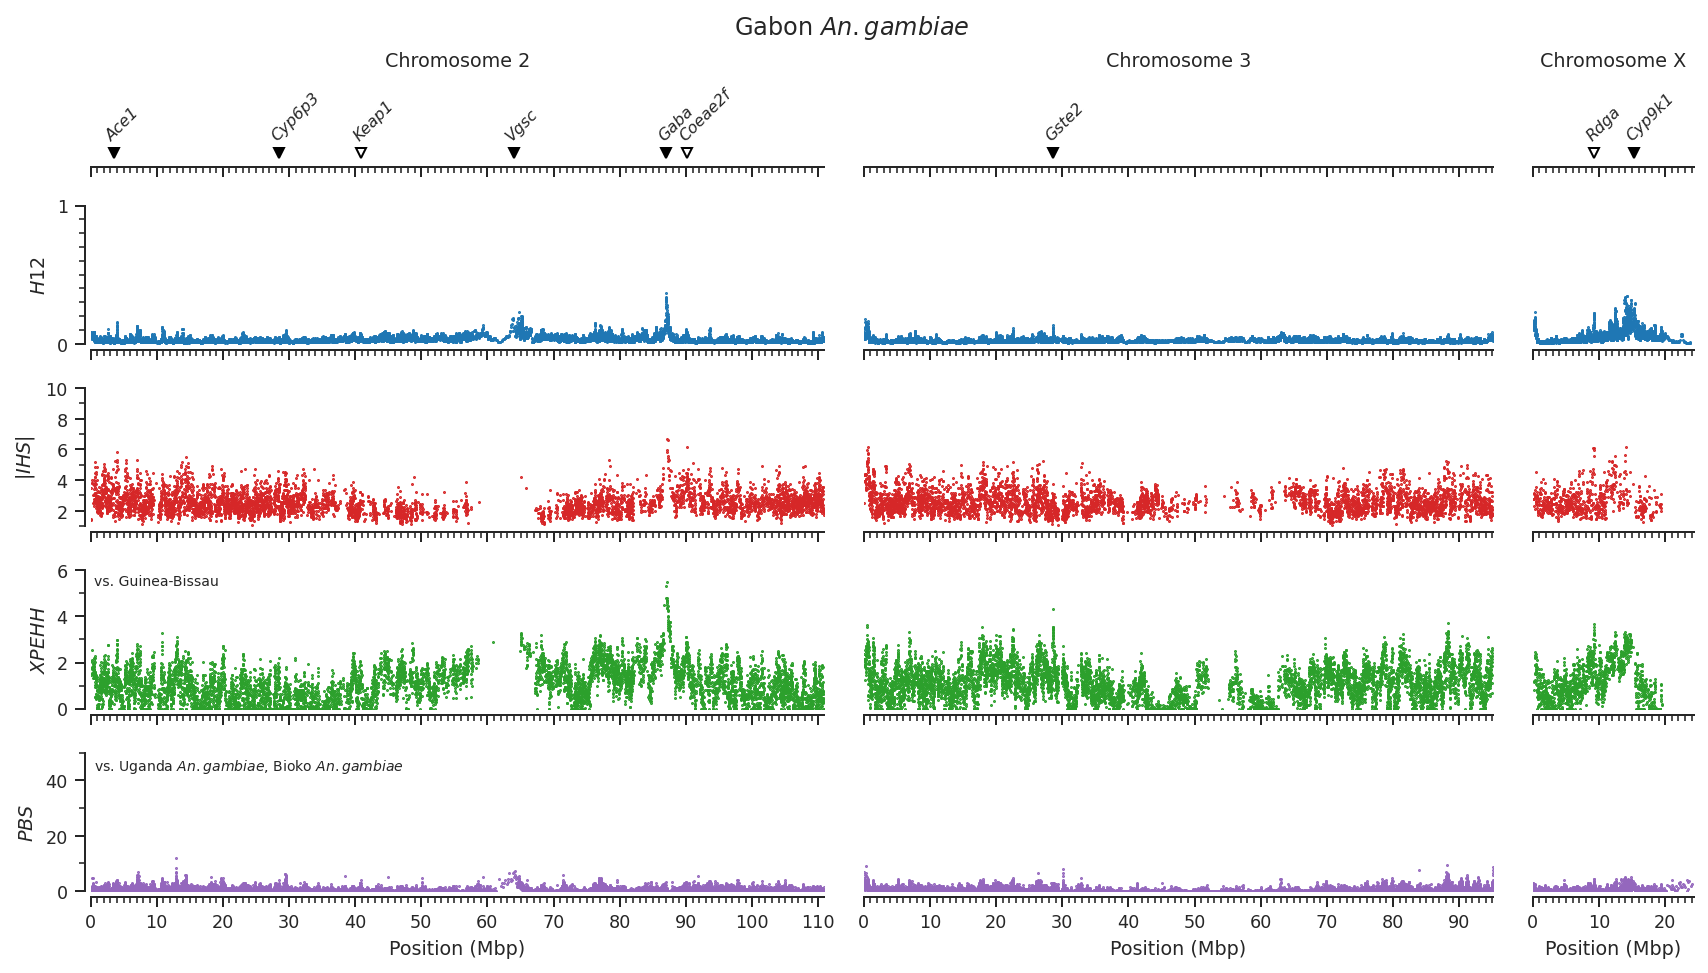

In [153]:
fig_gwss('ga_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

## Bioko *An. gambiae* 

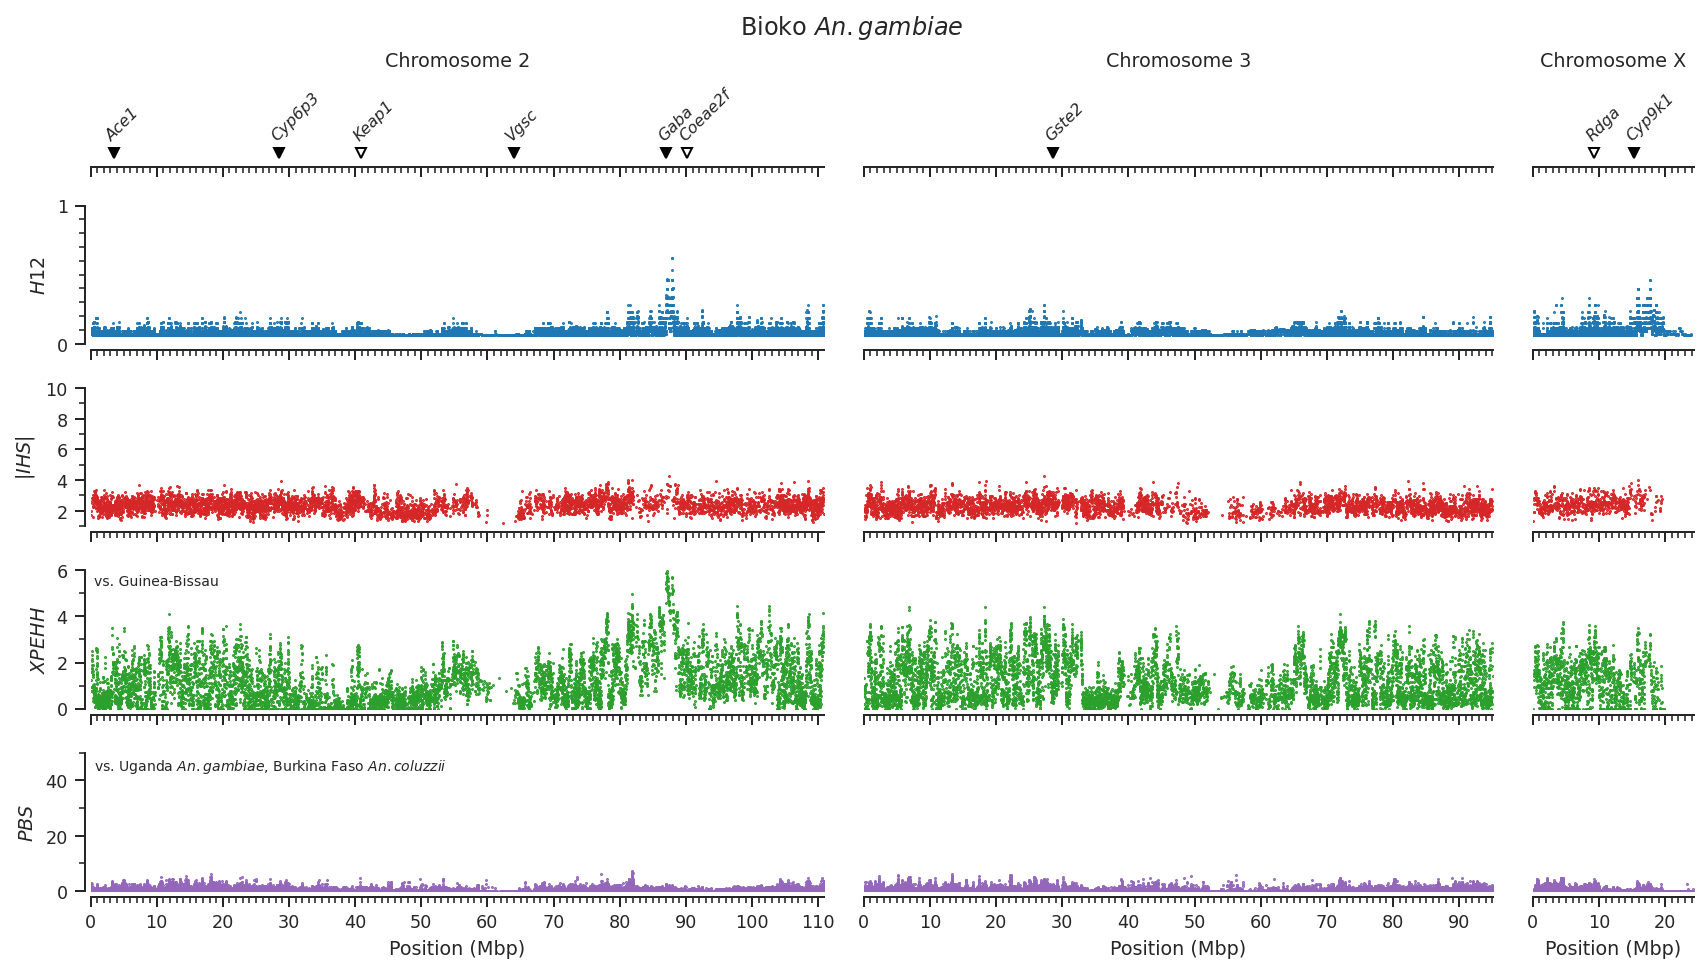

In [154]:
fig_gwss('gq_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'bf_col'))

## Mayotte *An. gambiae*

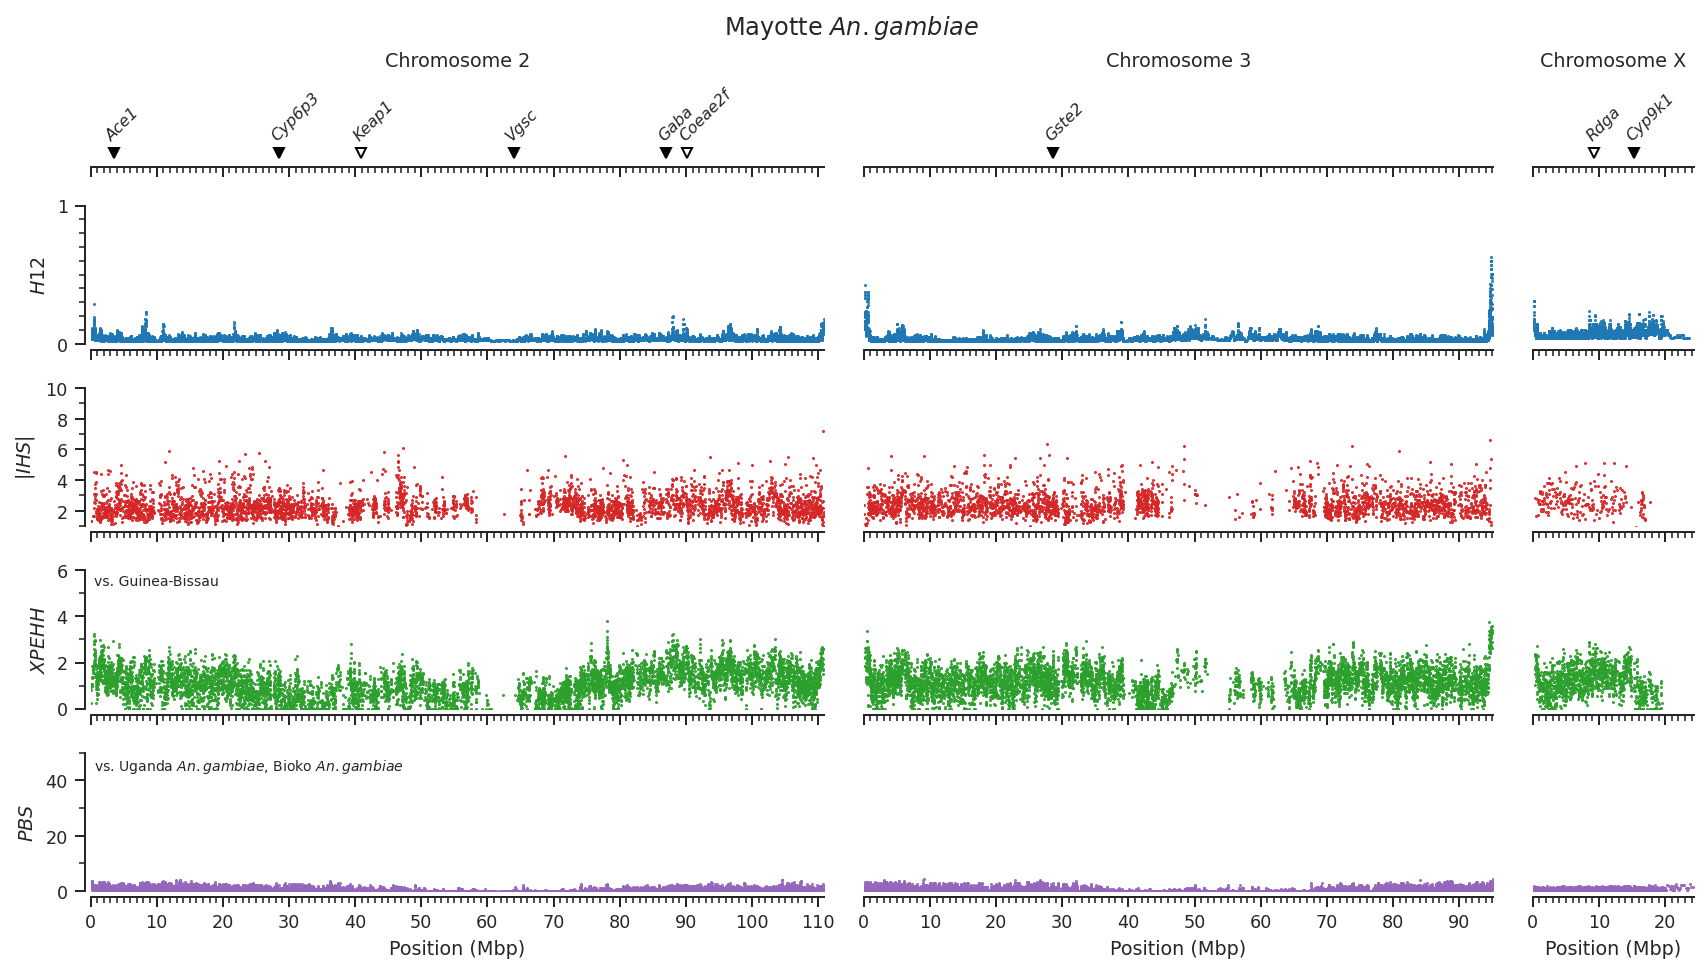

In [155]:
fig_gwss('fr_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

## Burkina Faso *An. coluzzii*

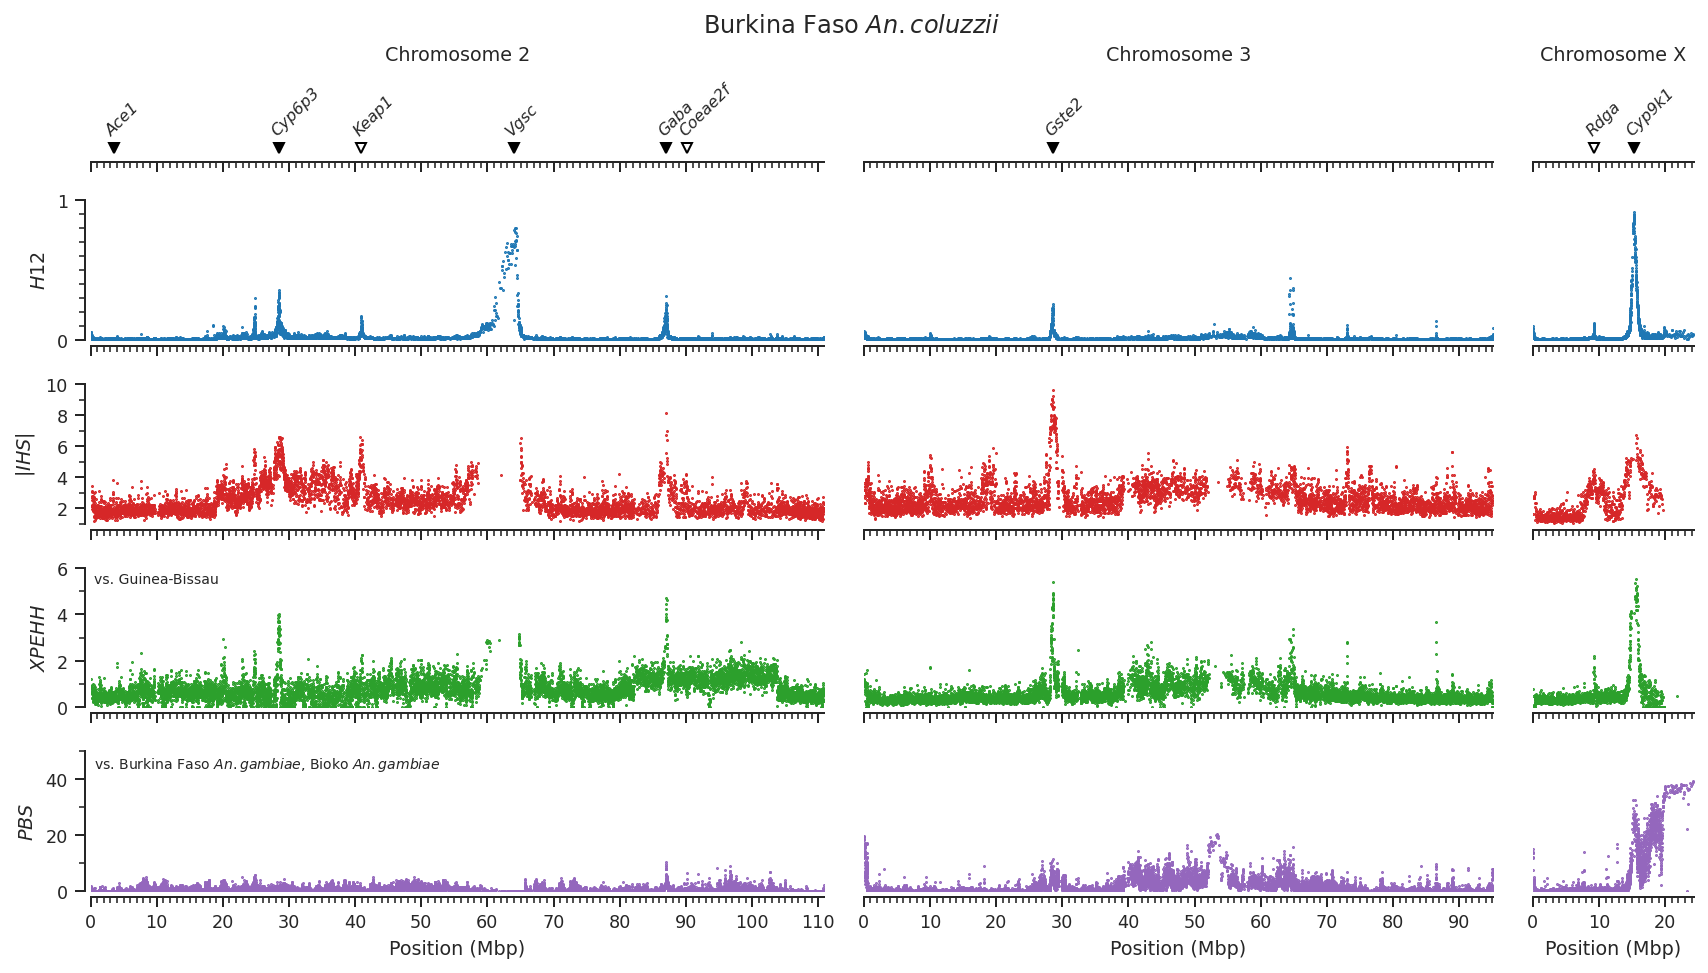

In [156]:
fig_gwss('bf_col', xpehh_pop='gw', pbs_pops=('bf_gam', 'gq_gam'))

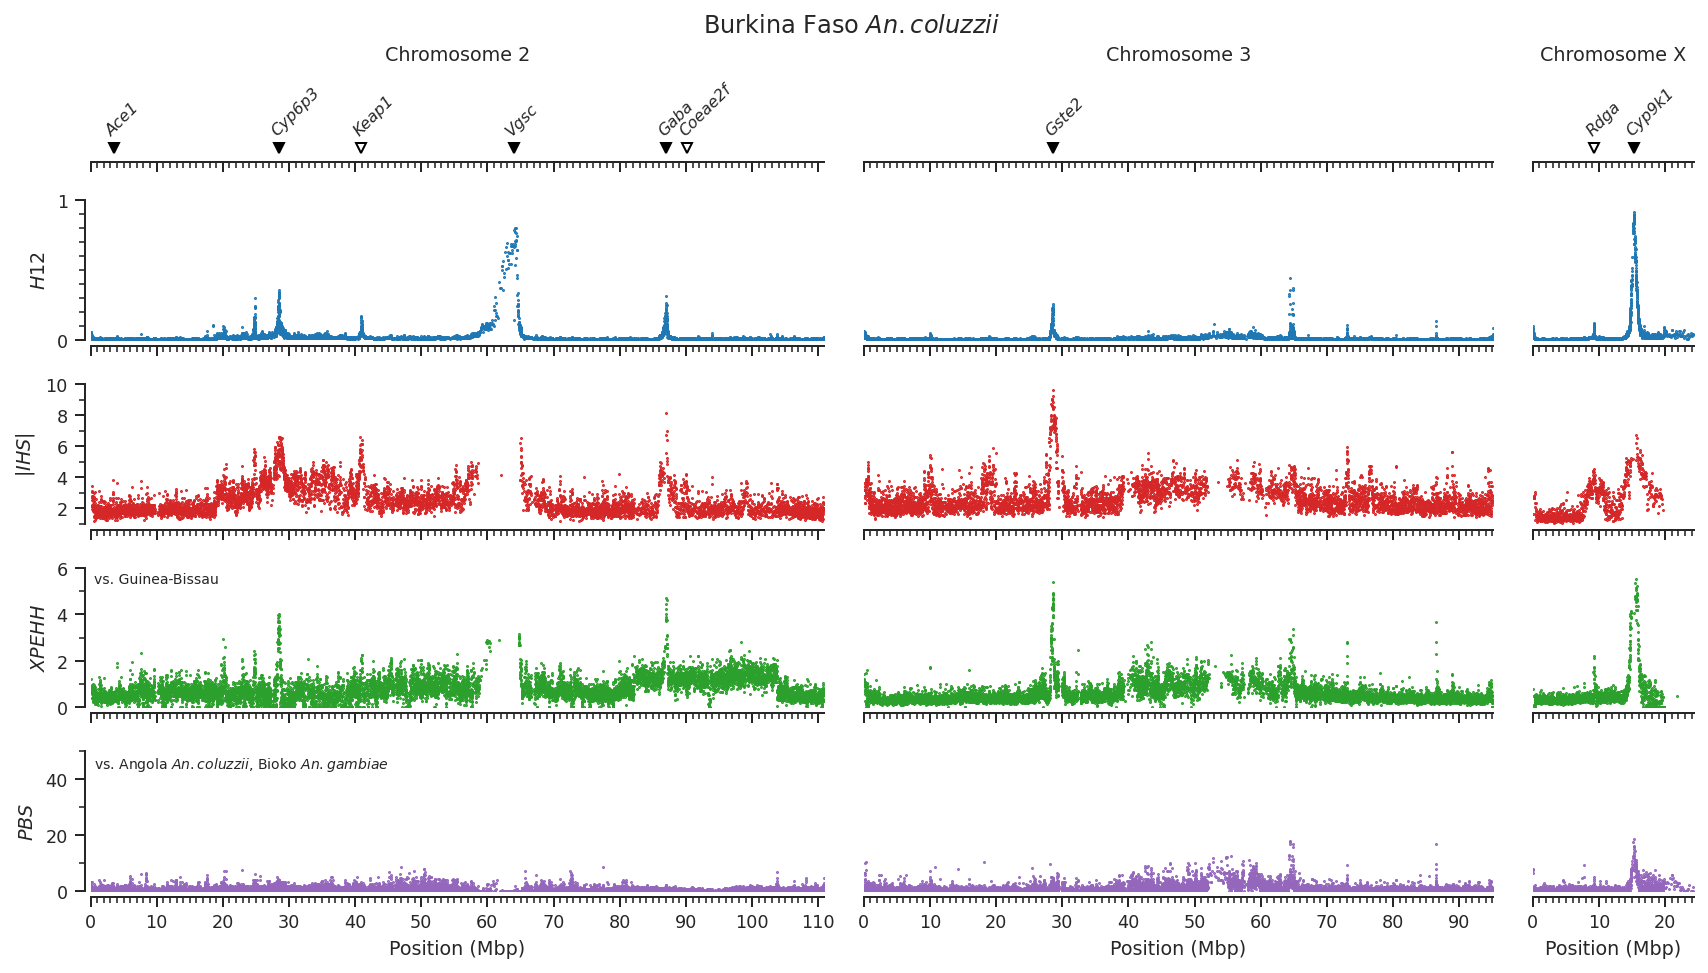

In [157]:
fig_gwss('bf_col', xpehh_pop='gw', pbs_pops=('ao_col', 'gq_gam'))

## Cote d'Ivoire *An. coluzzii*

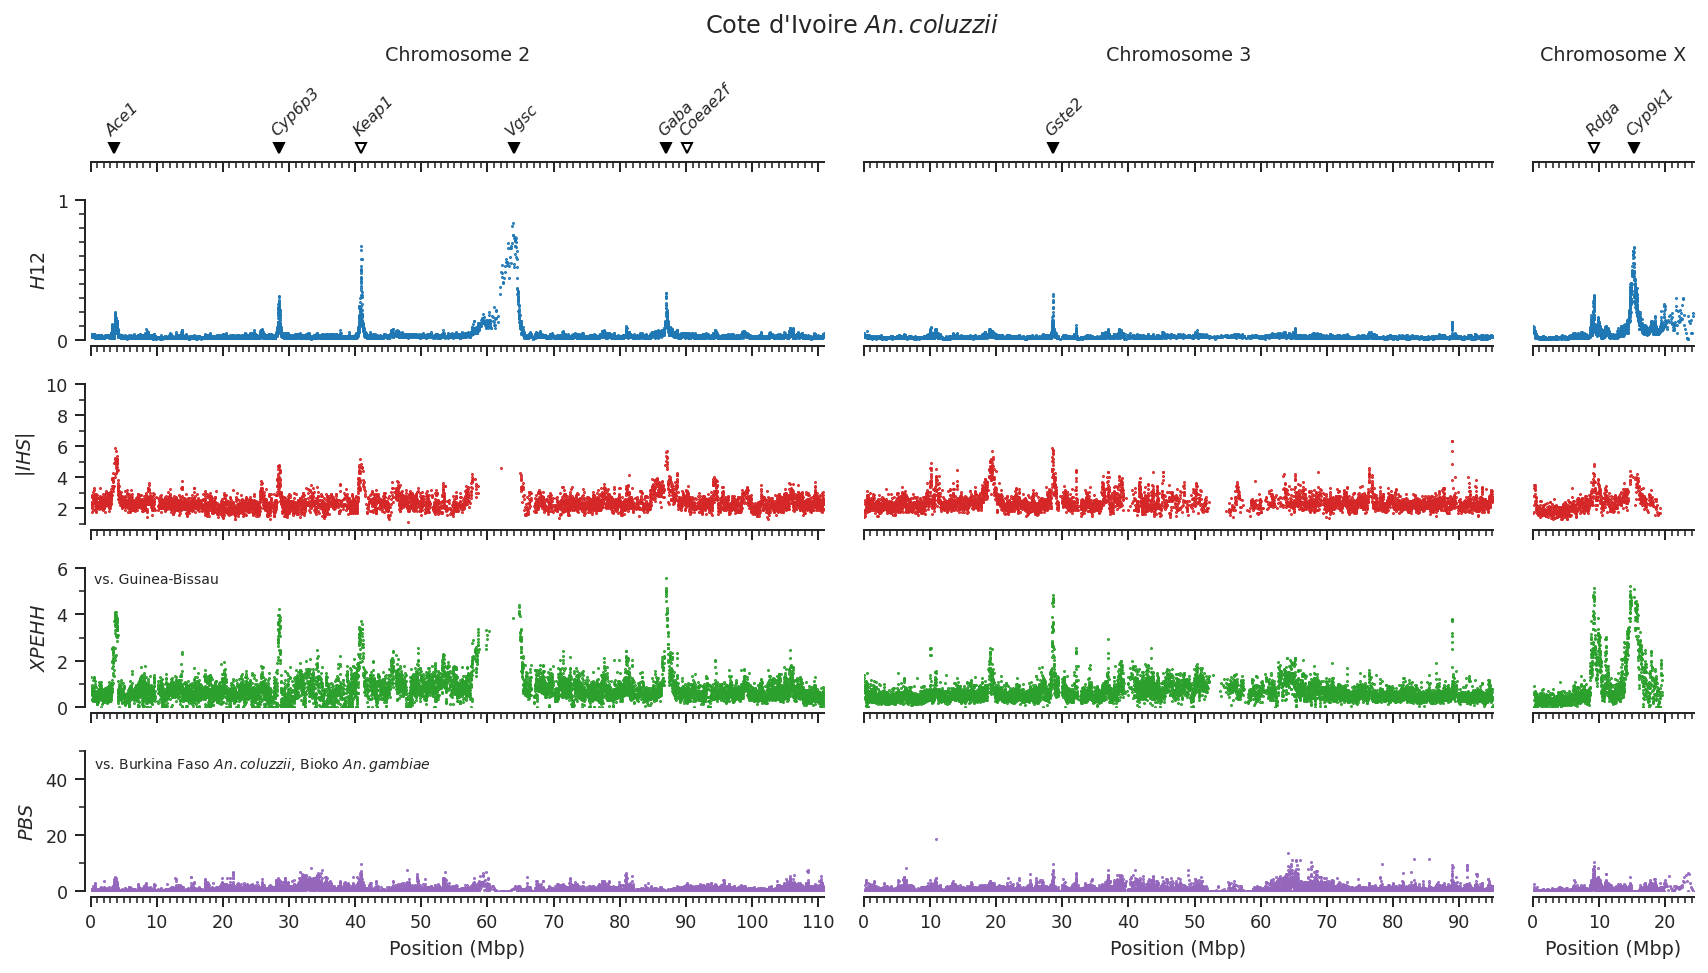

In [158]:
fig_gwss('ci_col', xpehh_pop='gw', pbs_pops=('bf_col', 'gq_gam'))

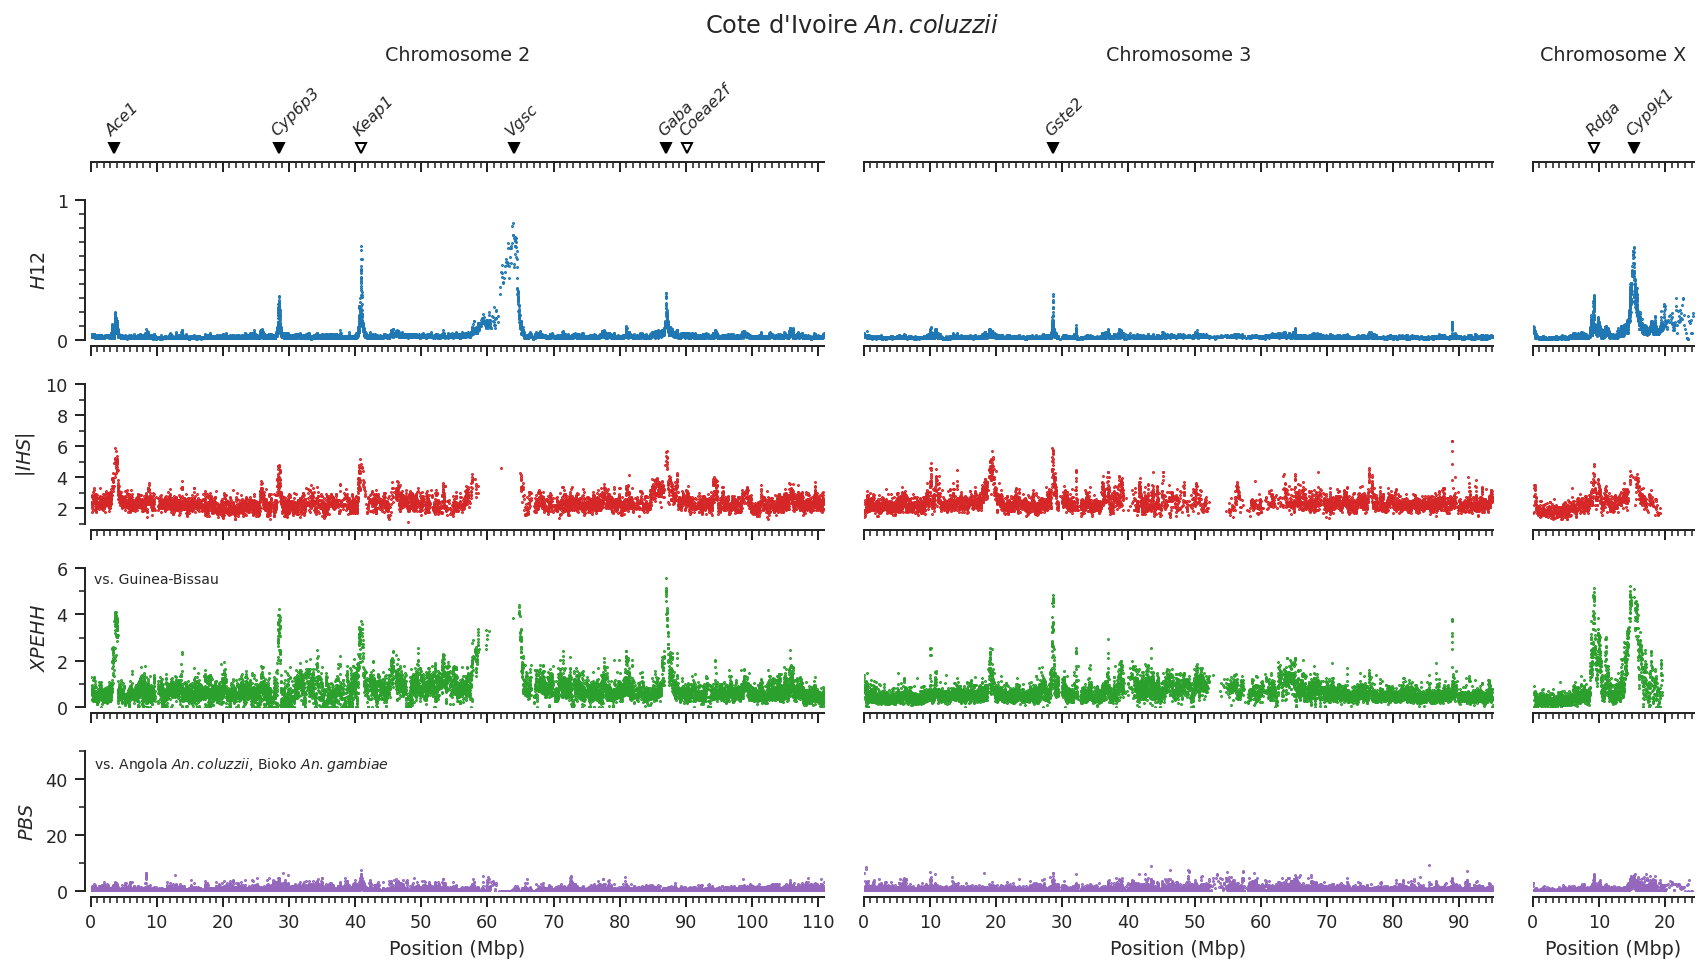

In [159]:
fig_gwss('ci_col', xpehh_pop='gw', pbs_pops=('ao_col', 'gq_gam'))

## Ghana *An. coluzzii*

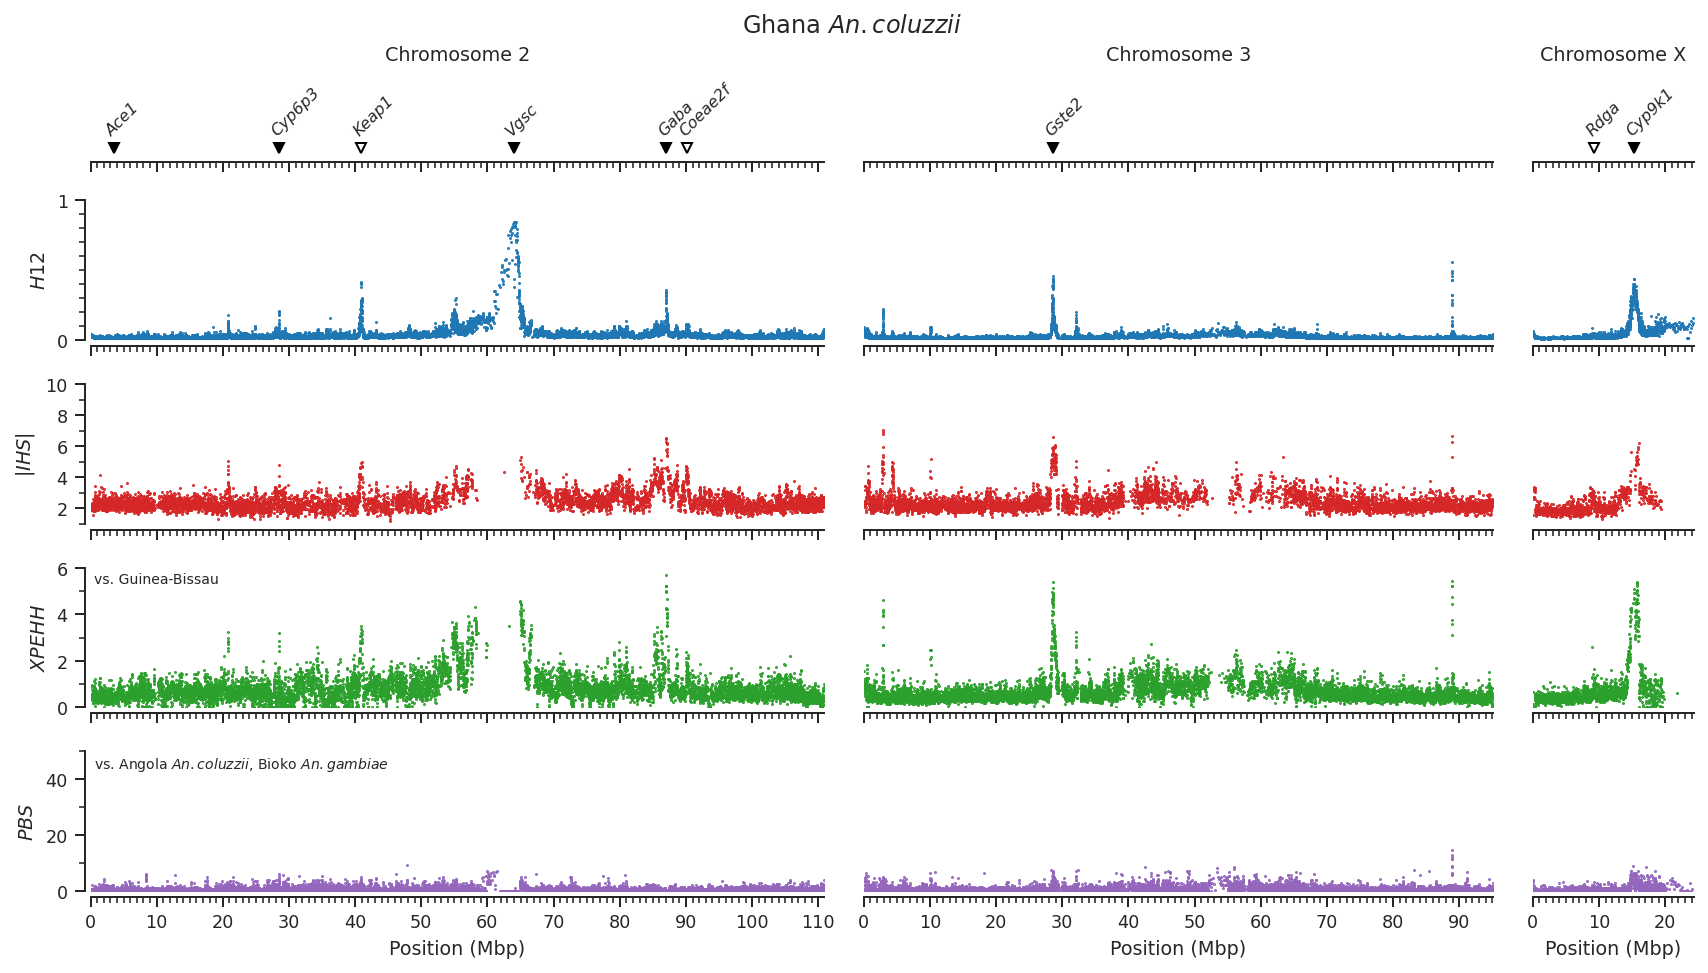

In [160]:
fig_gwss('gh_col', xpehh_pop='gw', pbs_pops=('ao_col', 'gq_gam'))

In [161]:
# TODO novel locus 3:89?

## Angola *An. coluzzii*

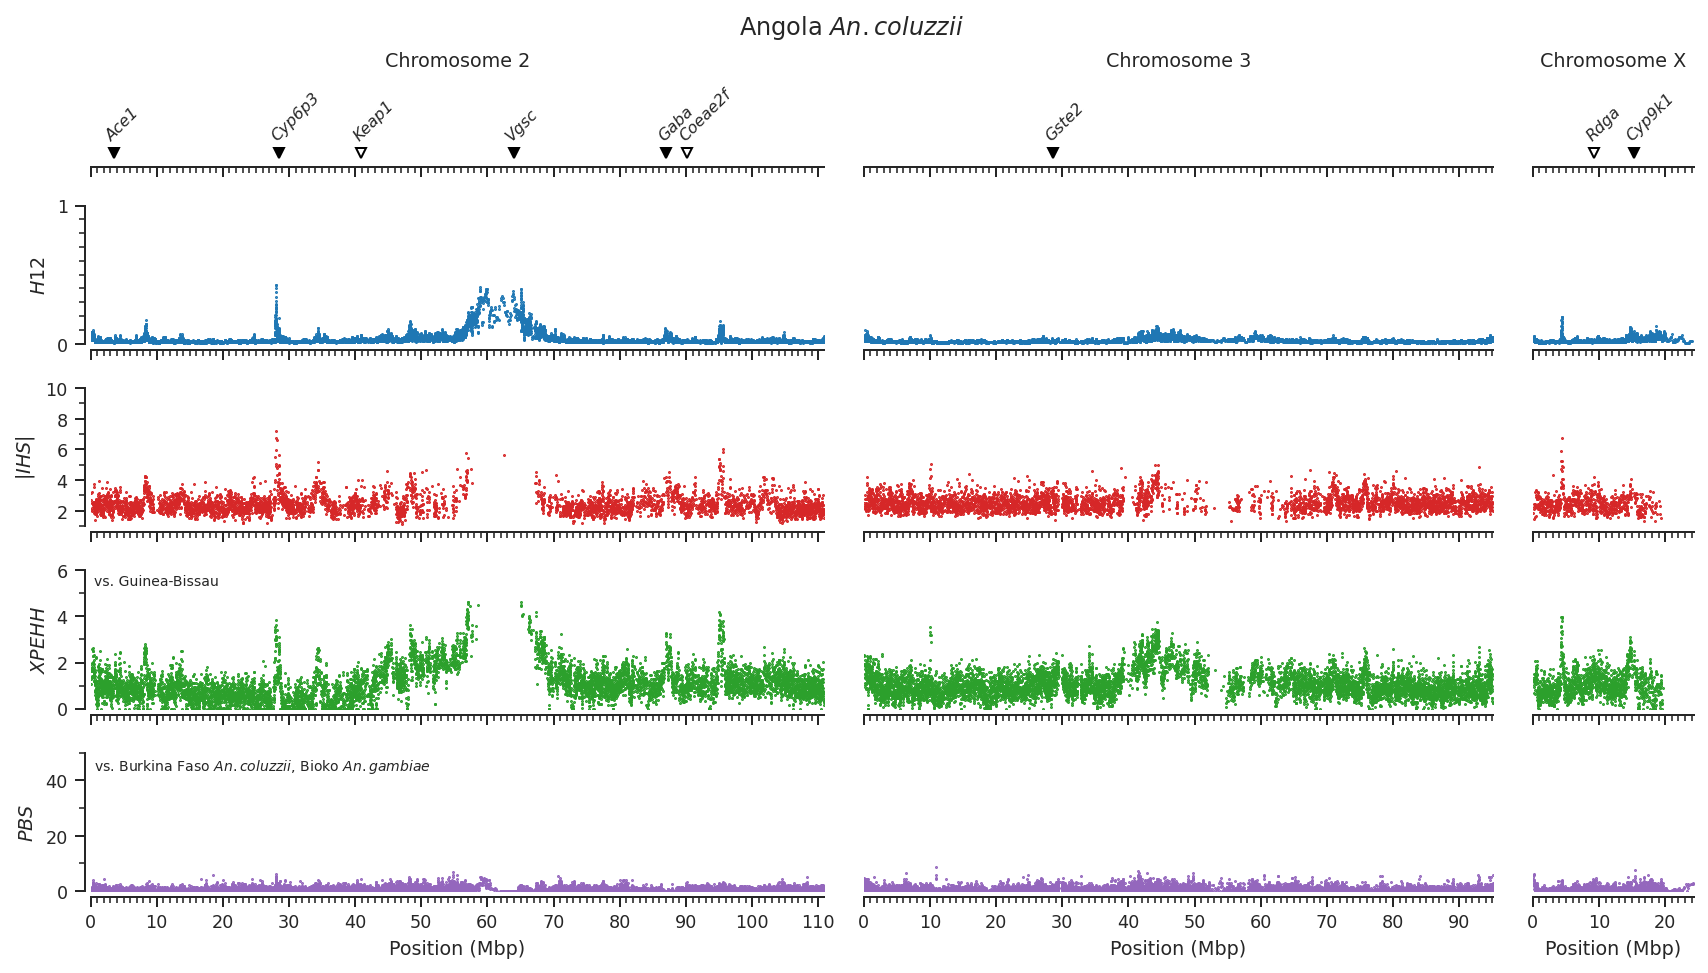

In [162]:
fig_gwss('ao_col', xpehh_pop='gw', pbs_pops=('bf_col', 'gq_gam'))

## Guinea-Bissau

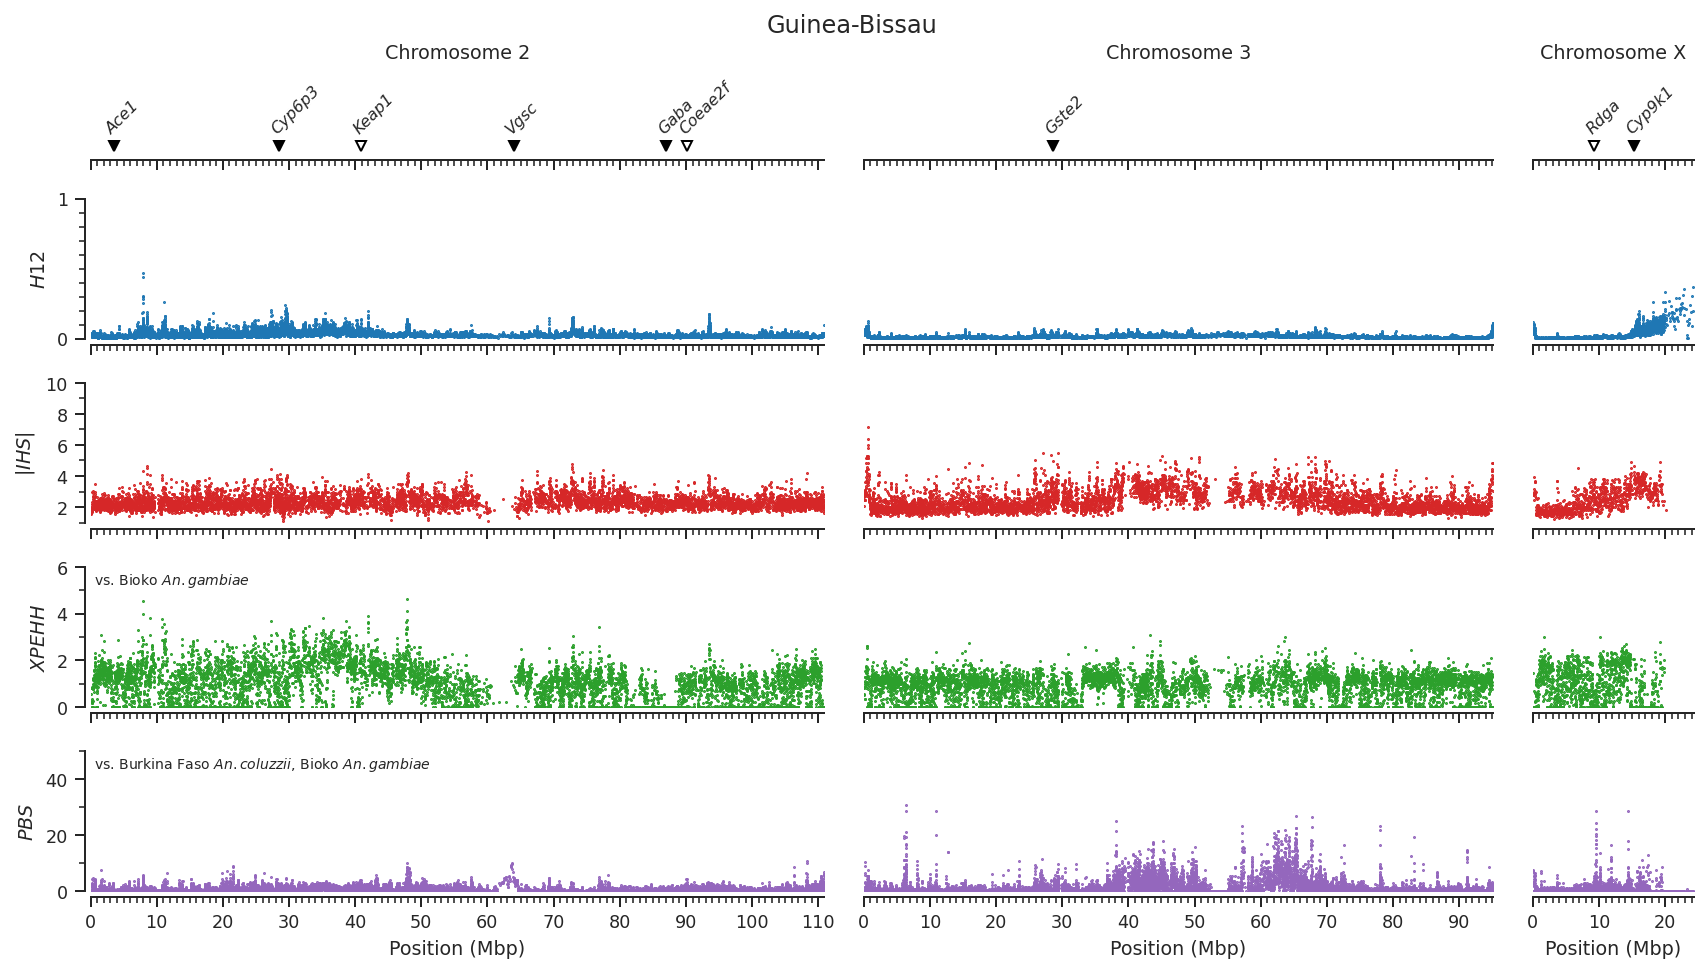

In [163]:
fig_gwss('gw', xpehh_pop='gq_gam', pbs_pops=('bf_col', 'gq_gam'))

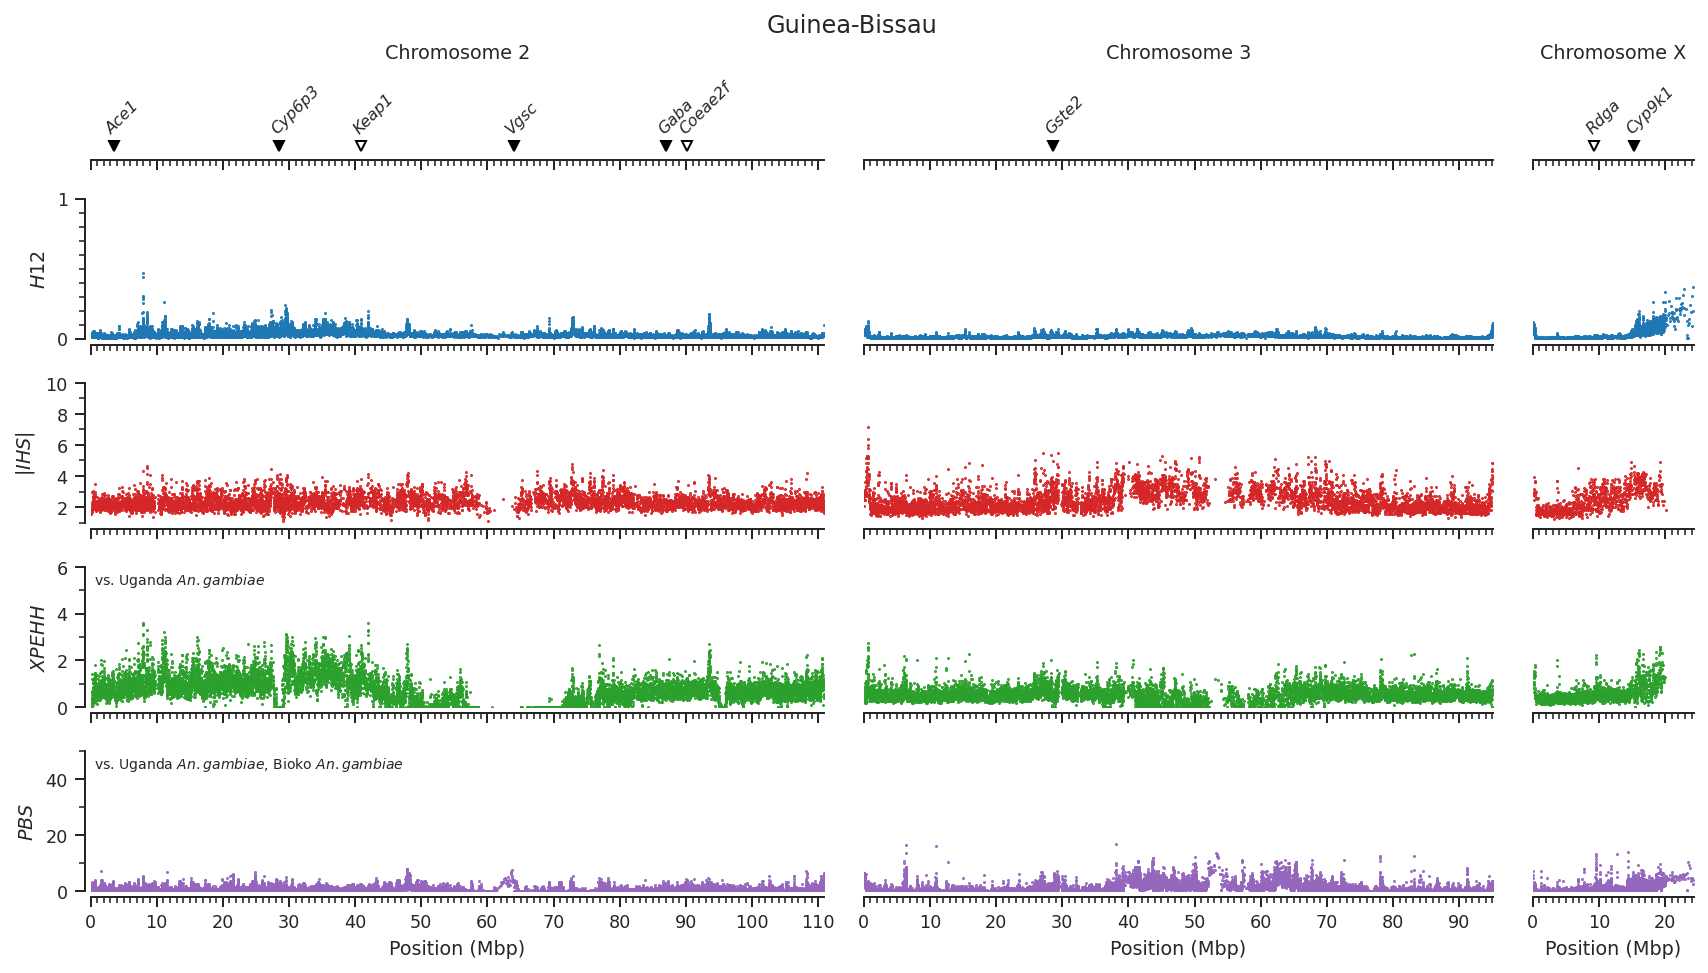

In [164]:
fig_gwss('gw', xpehh_pop='ug_gam', pbs_pops=('ug_gam', 'gq_gam'))

## The Gambia

In [165]:
[x for x in xpehh_root if x.startswith('gm')], [x for x in pbs_root if x.startswith('gm')]

(['gm_gq_gam'],
 ['gm_bf_col_gq_gam', 'gm_bf_gam_gq_gam', 'gm_gw_gq_gam', 'gm_ug_gam_gq_gam'])

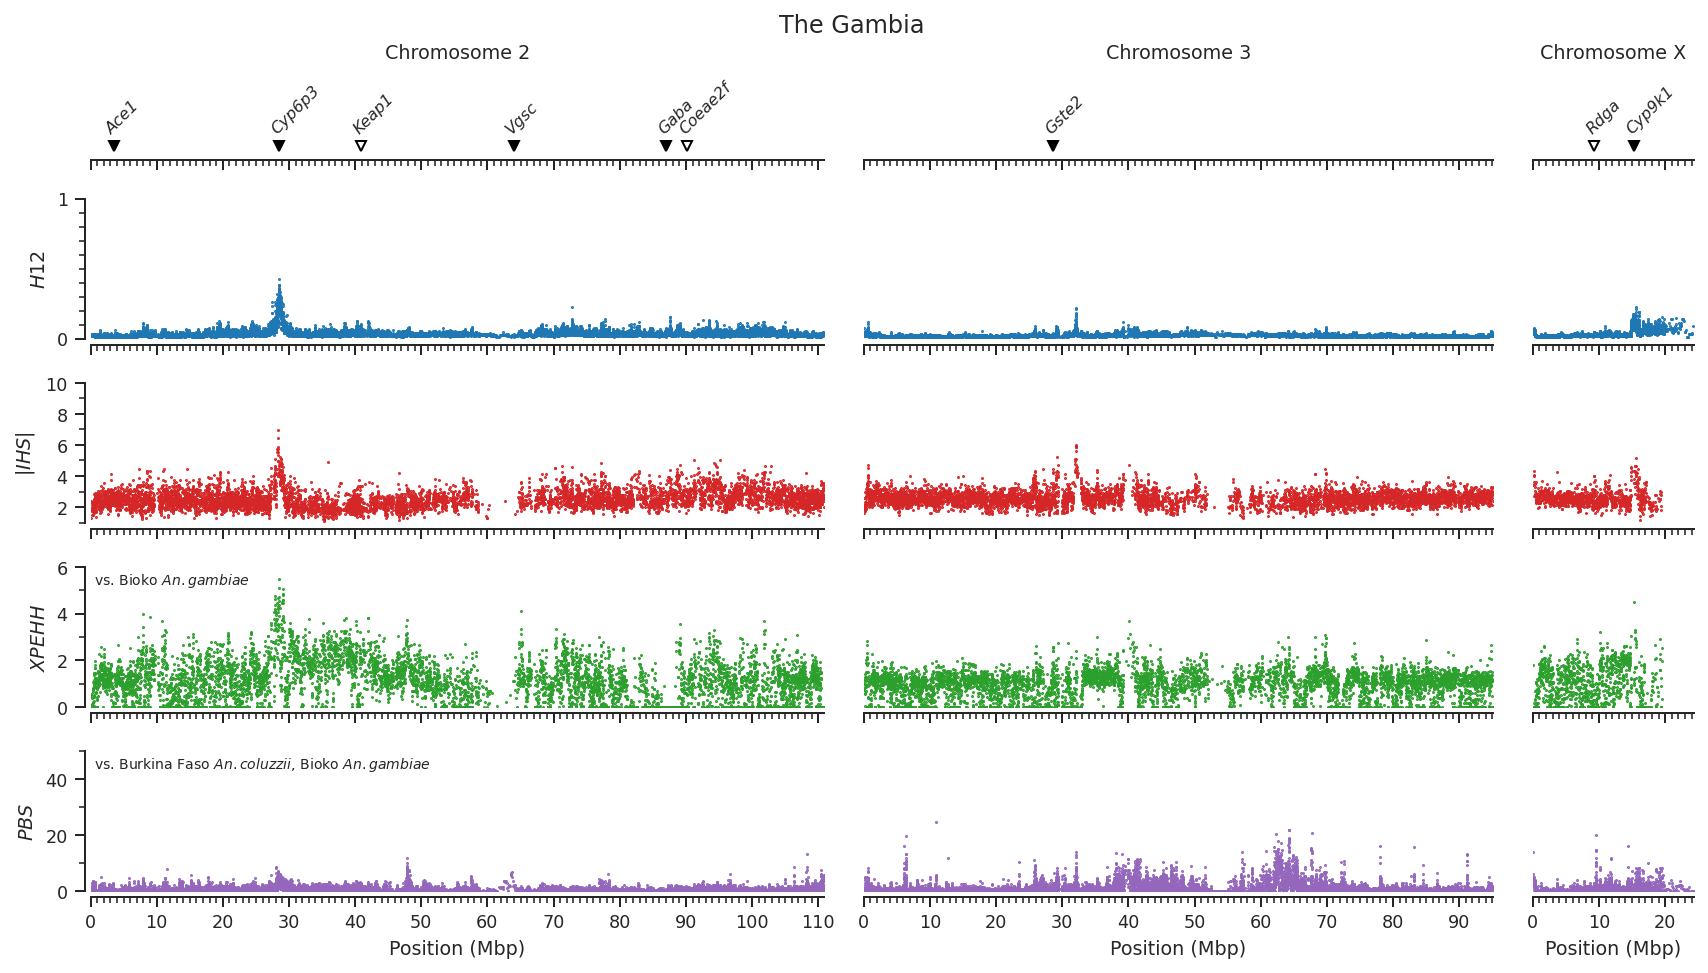

In [166]:
fig_gwss('gm', xpehh_pop='gq_gam', pbs_pops=('bf_col', 'gq_gam'))